# Tutorial for DL concepts

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torchviz import make_dot
import seaborn as sns
from matplotlib import cm
import matplotlib.animation as animation

%matplotlib notebook
sns.set_palette("colorblind")
plt.close('all')
params = {'text.usetex': True,
          'axes.labelsize': 12,
          'figure.figsize': (8, 8),
          'font.size': 16,
          'legend.fontsize': 16,
          'xtick.labelsize' : 8,
          'ytick.labelsize' : 8,
          'text.latex.preamble' : r'\usepackage{{amsmath}}',
          }
plt.rcParams.update(params)

## From the perceptron to more
The perceptron is a linear function: $y = f(x) = wx + b$, we apply the RELU regularization at the end

In [2]:
class Perceptron(torch.nn.Module):
    def __init__(self, d=1):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(d, 1)  # wx + b
        self.relu = torch.nn.ReLU()  # ReLu()
    
    def forward(self, x):
        out = self.fc(x)
        out = self.relu(out)
        return out

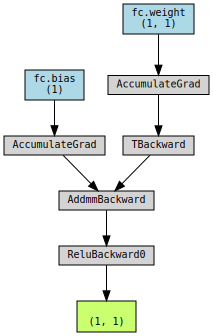

In [3]:
model = Perceptron()
x = torch.tensor([0., 1.])

yhat = model(x[0].reshape(1, -1))
make_dot(yhat, params=dict(list(model.named_parameters())))

Let's see how it is made:

In [4]:
print(model.fc.weight)
print(model.fc.bias)
model.fc.weight.data = torch.tensor([[1.]])
model.fc.bias.data = torch.tensor([2.])
print(model.fc.weight)
print(model.fc.bias)

Parameter containing:
tensor([[0.5146]], requires_grad=True)
Parameter containing:
tensor([-0.3256], requires_grad=True)
Parameter containing:
tensor([[1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [5]:
model(torch.tensor([4.])) == 1 * 4 + 2

tensor([True])

Let us make an indicator function with 2 neurons and a sigmoid activation function.
The function is now:
$$y = f(x) = (w_3a_1 + w_3a_2) = (w_3 \sigma(w_1 x + b_1) + w_4 \sigma(w_2 x + b_2)) \enspace.$$

In [77]:
class Two_Perceptron(torch.nn.Module):
    def __init__(self):
        super(Two_Perceptron, self).__init__()
        self.in_fc = nn.Linear(1, 2)
        self.fc = nn.Linear(2, 1)
        self.sig = nn.Sigmoid()
    
    def forward(self, x):
        out = self.in_fc(x)
        out = self.sig(out)
        out = self.fc(out)
        return out

In [78]:
model = Two_Perceptron()
model.in_fc.weight.data = torch.tensor([[1000.], [1000.]])
model.in_fc.bias.data = torch.tensor([1000, -1000.])
print(model.in_fc.weight)
print(model.in_fc.bias)

model.fc.weight.data = torch.tensor([[1., -1.]])
model.fc.bias.data = torch.tensor([0.])

print(model.fc.weight)
print(model.fc.bias)

Parameter containing:
tensor([[1000.],
        [1000.]], requires_grad=True)
Parameter containing:
tensor([ 1000., -1000.], requires_grad=True)
Parameter containing:
tensor([[ 1., -1.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


<IPython.core.display.Javascript object>


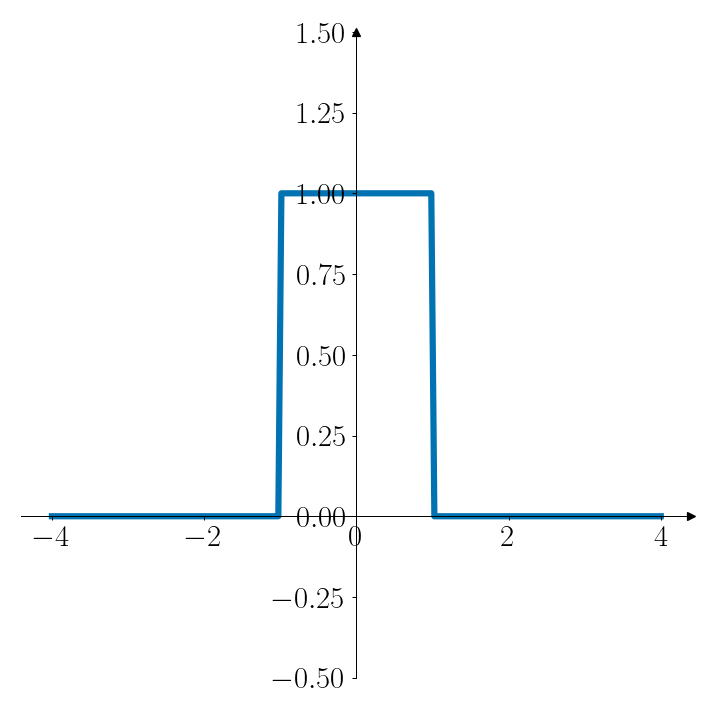

In [82]:
x = torch.linspace(-4, 4, 200)
y = [model(x[i].reshape(-1, 1)).detach().numpy().flatten() for i in range(len(x))]

fig, ax = plt.subplots()
ax.spines[["left", "bottom"]].set_position(("data", 0))
# Hide the top and right spines.
ax.spines[["top", "right"]].set_visible(False)
ax.plot(x, y, lw=5,zorder=-1)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_ylim(-0.5, 1.5)
plt.tight_layout()
plt.savefig('../tex/prebuiltimages/step_with_mlp.pdf', bbox_inches='tight')
plt.show()

In [94]:
class Three_Perceptron(torch.nn.Module):
    def __init__(self):
        super(Three_Perceptron, self).__init__()
        self.in_fc = nn.Linear(1, 4)
        self.fc = nn.Linear(4, 1)
        self.sig = nn.ReLU()
    
    def forward(self, x):
        out = self.in_fc(x)
        out = self.sig(out)
        out = self.fc(out)
        return out

In [121]:
model = Three_Perceptron()
model.in_fc.weight.data = torch.tensor([[1.], [1.], [1.]])
model.in_fc.bias.data = torch.tensor([1, 0.,-1])
print(model.in_fc.weight)
print(model.in_fc.bias)

model.fc.weight.data = torch.tensor([[1.,-2, 1.]])
model.fc.bias.data = torch.tensor([0.])

print(model.fc.weight)
print(model.fc.bias)

Parameter containing:
tensor([[1.],
        [1.],
        [1.]], requires_grad=True)
Parameter containing:
tensor([ 1.,  0., -1.], requires_grad=True)
Parameter containing:
tensor([[ 1., -2.,  1.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


<IPython.core.display.Javascript object>


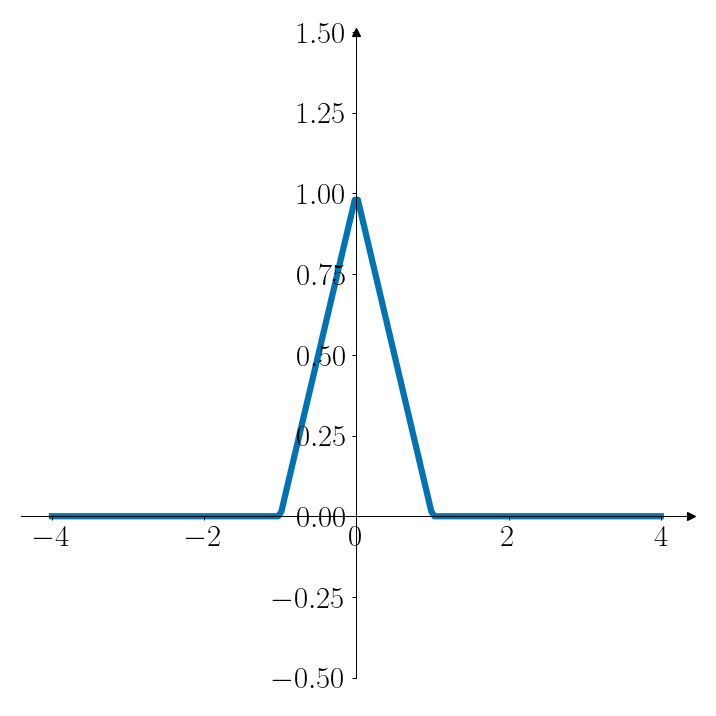

In [122]:
x = torch.linspace(-4, 4, 200)
y = [model(x[i].reshape(-1, 1)).detach().numpy().flatten() for i in range(len(x))]

fig, ax = plt.subplots()
ax.spines[["left", "bottom"]].set_position(("data", 0))
# Hide the top and right spines.
ax.spines[["top", "right"]].set_visible(False)
ax.plot(x, y, lw=5,zorder=-1)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_ylim(-0.5, 1.5)
plt.tight_layout()
plt.savefig('../tex/prebuiltimages/step_with_mlp_relu.pdf', bbox_inches='tight')
plt.show()

## RELU and universal approximation


<IPython.core.display.Javascript object>


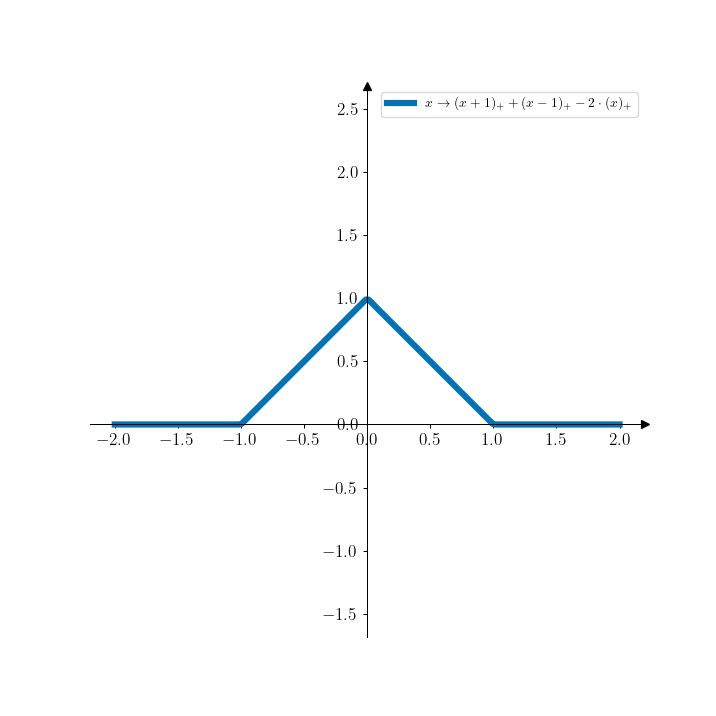

In [28]:
params = {'text.usetex': True,
          'axes.labelsize': 12,
          'figure.figsize': (8, 8),
          'font.size': 16,
          'legend.fontsize': 16,
          'xtick.labelsize' : 14,
          'ytick.labelsize' : 14,
          'text.latex.preamble' : r'\usepackage{{amsmath}}',
          }
plt.rcParams.update(params)

fig, ax = plt.subplots()

ax.spines[["left", "bottom"]].set_position(("data", 0))
# Hide the top and right spines.
ax.spines[["top", "right"]].set_visible(False)

x = torch.linspace(-2, 2, 200)
m = torch.nn.ReLU()
g = m(x+1) + m(x-1) - 2 * m(x)
plt.plot(x, g, lw = 5, label= r"$x\to(x+1)_{+} + (x-1)_{+} - 2\cdot(x)_{+}$")
plt.axis('equal')
ax.set_ylim(-0.5,1.5)
# ax.set_ylim(-2,2)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
# ax.set_title(r"$x\to(x+1)_{+} + (x-1)_{+} - 2\cdot(x)_{+}$")
plt.legend(loc=1,fontsize=11)
plt.show()
fig.savefig("../tex/prebuiltimages/relu_triangle.pdf")

<IPython.core.display.Javascript object>


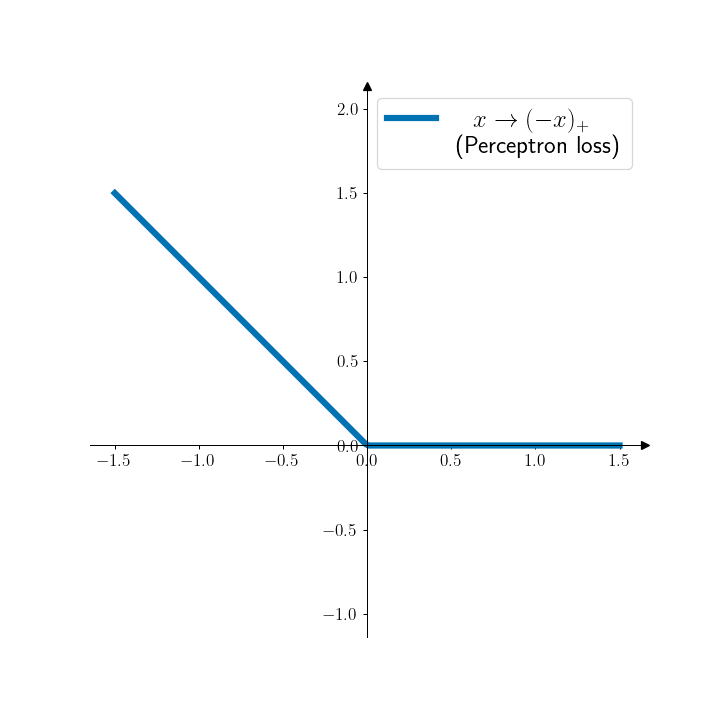

In [29]:
fig, ax = plt.subplots()

ax.spines[["left", "bottom"]].set_position(("data", 0))
# Hide the top and right spines.
ax.spines[["top", "right"]].set_visible(False)

x = torch.linspace(-1.5, 1.5, 200)
m = torch.nn.ReLU()
g = m(-x) 
plt.plot(x, g, lw = 5, label= r"$x\to(-x)_{+}$ \\ (Perceptron loss)")
plt.axis('equal')
ax.set_ylim(-0.5,1.5)
# ax.set_ylim(-2,2)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
# ax.set_title(r"$x\to(x+1)_{+} + (x-1)_{+} - 2\cdot(x)_{+}$")
plt.legend(loc="upper right", prop={'size': 20})
plt.show()
fig.savefig("../tex/prebuiltimages/perceptron_loss.pdf")

<IPython.core.display.Javascript object>


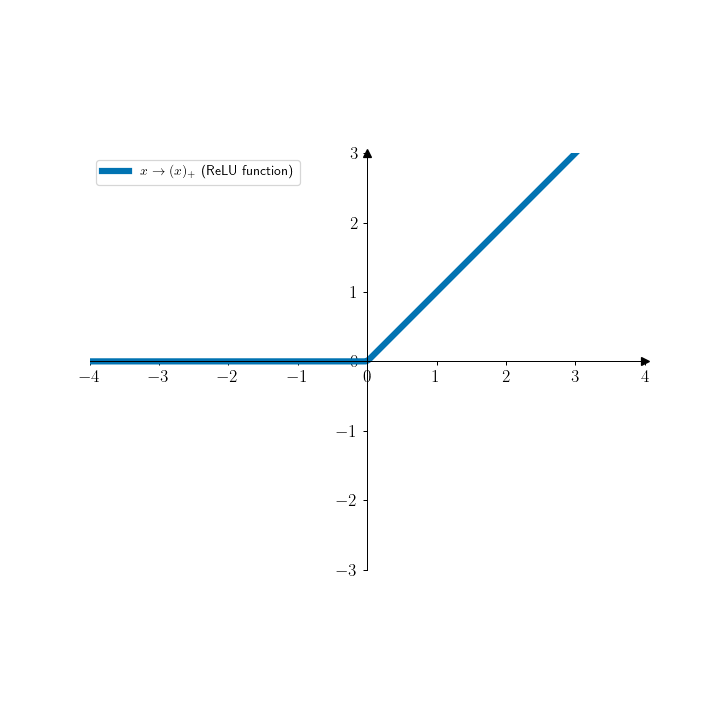

In [31]:
fig, ax = plt.subplots()

ax.spines[["left", "bottom"]].set_position(("data", 0))
# Hide the top and right spines.
ax.spines[["top", "right"]].set_visible(False)

x = torch.linspace(-4, 4, 200)
m = torch.nn.ReLU()
g = m(x) 
plt.plot(x, g, lw = 5, label= r"$x\to(x)_{+}$ (ReLU function)")
plt.axis('square')
ax.set_ylim(-3,3)
ax.set_xlim(-4,4)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
# ax.set_title(r"$x\to(x+1)_{+} + (x-1)_{+} - 2\cdot(x)_{+}$")
plt.legend(loc=2,fontsize=11)
plt.show()
fig.savefig("../tex/prebuiltimages/ReLU.pdf")

<IPython.core.display.Javascript object>


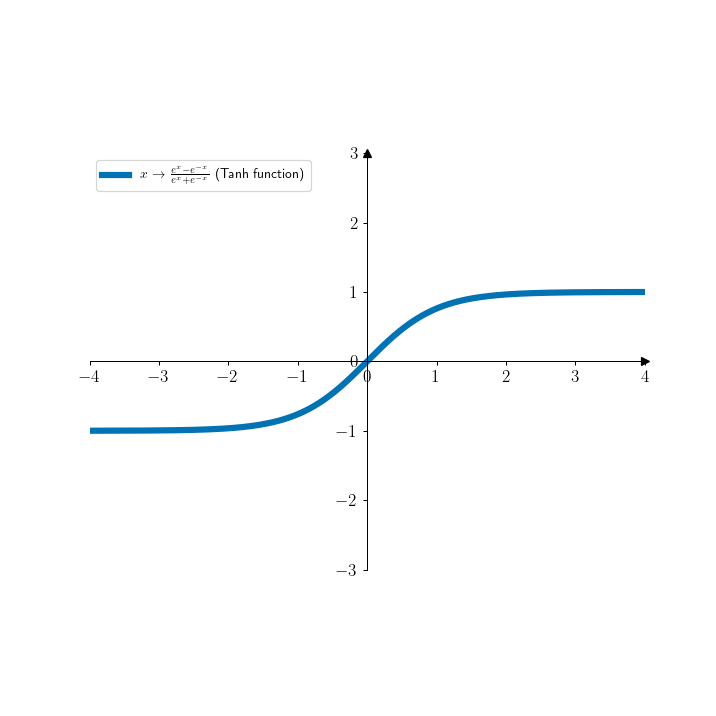

In [33]:
fig, ax = plt.subplots()

ax.spines[["left", "bottom"]].set_position(("data", 0))
# Hide the top and right spines.
ax.spines[["top", "right"]].set_visible(False)

x = torch.linspace(-4, 4, 200)
m = torch.nn.Tanh()
g = m(x) 
plt.plot(x, g, lw = 5, label= r"$x\to \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$ (Tanh function)")
plt.axis('square')
ax.set_ylim(-3,3)
ax.set_xlim(-4,4)

# ax.set_ylim(-2,2)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
# ax.set_title(r"$x\to(x+1)_{+} + (x-1)_{+} - 2\cdot(x)_{+}$")
plt.legend(loc=2,fontsize=11)
plt.show()
fig.savefig("../tex/prebuiltimages/Tanh.pdf")

<IPython.core.display.Javascript object>


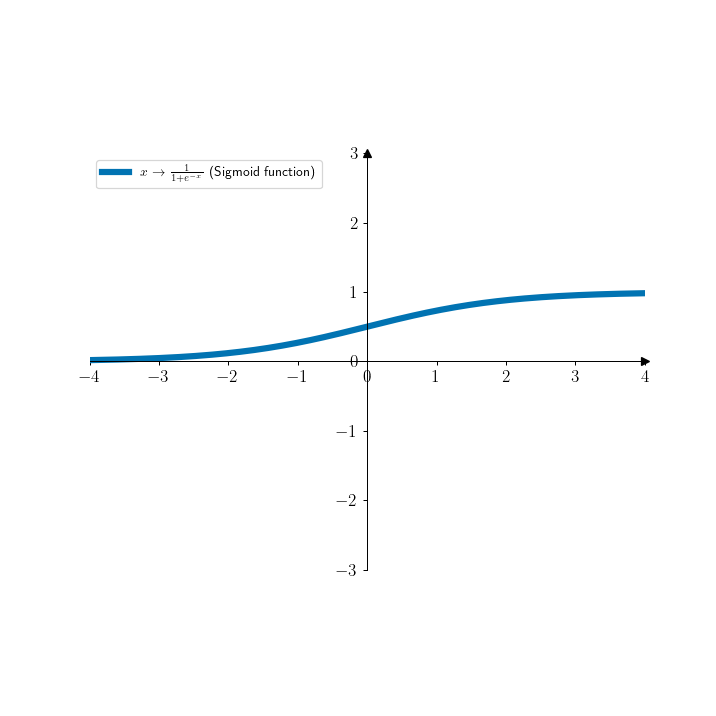

In [34]:
fig, ax = plt.subplots()

ax.spines[["left", "bottom"]].set_position(("data", 0))
# Hide the top and right spines.
ax.spines[["top", "right"]].set_visible(False)

x = torch.linspace(-4, 4, 200)
m = torch.nn.Sigmoid()
g = m(x) 
plt.plot(x, g, lw = 5, label= r"$x\to \frac{1}{1+e^{-x}}$ (Sigmoid function)")
plt.axis('square')
ax.set_ylim(-3,3)
ax.set_xlim(-4,4)

# ax.set_ylim(-2,2)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
# ax.set_title(r"$x\to(x+1)_{+} + (x-1)_{+} - 2\cdot(x)_{+}$")
plt.legend(loc=2,fontsize=11)
plt.show()
fig.savefig("../tex/prebuiltimages/Sigmoid.pdf")

<IPython.core.display.Javascript object>


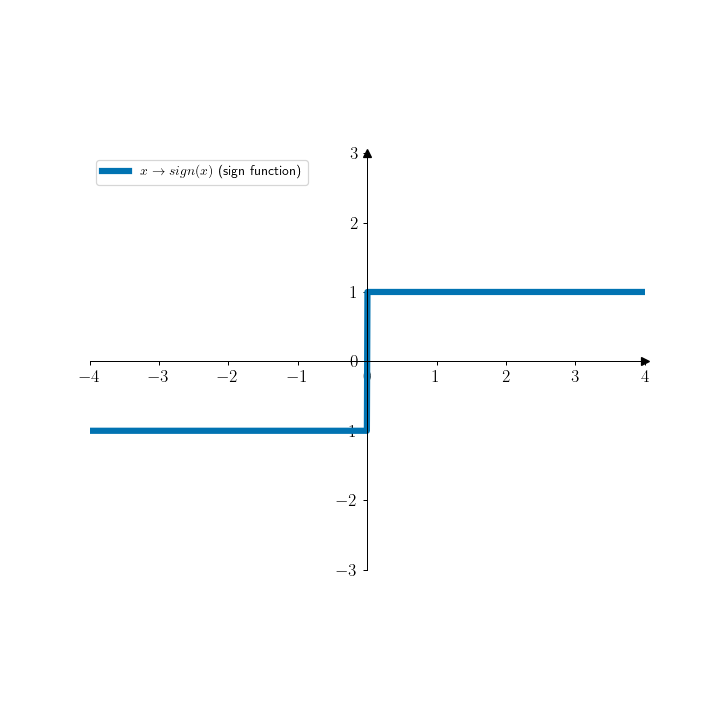

In [36]:
fig, ax = plt.subplots()

ax.spines[["left", "bottom"]].set_position(("data", 0))
# Hide the top and right spines.
ax.spines[["top", "right"]].set_visible(False)

x = torch.linspace(-4, 4, 1000)
m = np.sign
g = m(x) 
plt.plot(x, g, lw = 5, label= r"$x\to sign(x)$ (sign function)")
plt.axis('square')
ax.set_ylim(-3,3)
ax.set_xlim(-4,4)

# ax.set_ylim(-2,2)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
# ax.set_title(r"$x\to(x+1)_{+} + (x-1)_{+} - 2\cdot(x)_{+}$")
plt.legend(loc=2,fontsize=11)
plt.show()
fig.savefig("../tex/prebuiltimages/Sign.pdf")

## More neurons with single layer and universal theorem
Universal theorem with the hands: any continuous function can be approximated by a single hidden layer NN in a finite (possibly very very large) width but it might no generalize well.

<IPython.core.display.Javascript object>


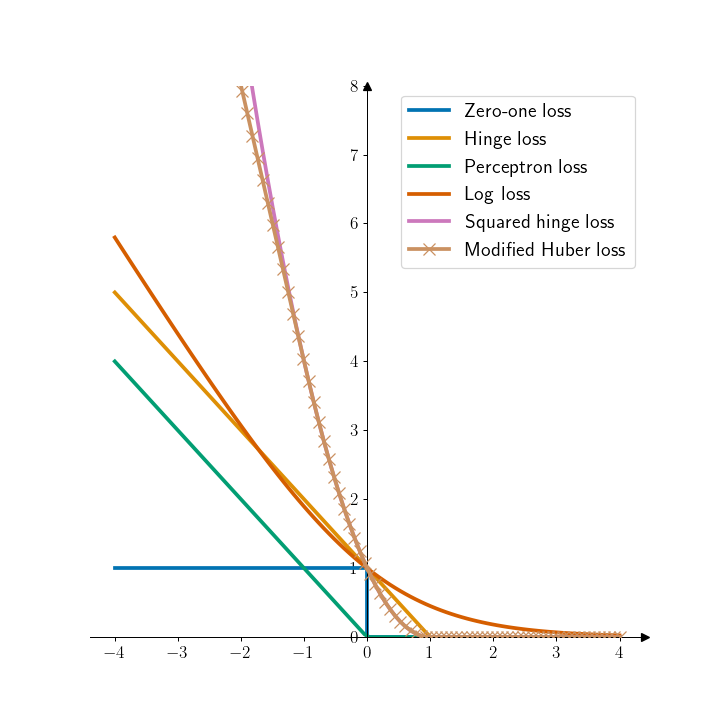

In [37]:
fig, ax = plt.subplots()


ax.spines[["left", "bottom"]].set_position(("data", 0))
# Hide the top and right spines.
ax.spines[["top", "right"]].set_visible(False)


def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.0] = 0
    return loss


xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 3
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0],  lw=lw, label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), lw=lw, label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), lw=lw, label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), lw=lw, label="Log loss")
plt.plot(
    xx,
    np.where(xx < 1, 1 - xx, 0) ** 2,
    lw=lw,
    label="Squared hinge loss",
)
plt.plot(
    xx,
    modified_huber_loss(xx, 1),
    lw=lw,
    marker="x",
    ms=10,
    zorder=4,
    label="Modified Huber loss",
)
plt.ylim((0, 8))
plt.legend(loc="upper right")
# plt.xlabel(r"Decision function $f(x)$")
# plt.ylabel("$L(y=1, f(x))$")
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
plt.show()
fig.savefig("../tex/prebuiltimages/sklearn_loss.pdf")

In [38]:
class FF_1L(torch.nn.Module):
    def __init__(self, d, width=1000):
        super(FF_1L, self).__init__()
        self.fc = nn.Linear(d, width)
        self.relu = torch.nn.ReLU()
        # self.sig = torch.nn.Sigmoid()
        self.fc2 = nn.Linear(width, 1)
    
    def forward(self, x):
        out = self.fc(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [39]:
n, d = 1000, 1
x, _ = torch.sort(((0 - 5) * torch.rand(n, d) + 5), dim=0)
def f(x):
    x_ = x.numpy()
    y = np.sin(x_) + 0.1*np.random.randn(*x_.shape)
    return torch.from_numpy(y).float()
y = f(x)
model = FF_1L(d, width=10)
model.train()

n_epoch = 5000
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
loss_func = torch.nn.MSELoss(size_average=False)
for epoch in range(n_epoch):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = loss_func(y_pred, y)
    loss.backward()
    optimizer.step()
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))

model2 = FF_1L(d, width=1000)
model2.train()

n_epoch = 5000
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-5)
loss_func = torch.nn.MSELoss(size_average=False)
for epoch in range(n_epoch):
    optimizer.zero_grad()
    y_pred = model2(x)
    loss = loss_func(y_pred, y)
    loss.backward()
    optimizer.step()
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))

/home/jsalmon/anaconda3/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch 0: train loss: 392.4951477050781
Epoch 1: train loss: 348.7883605957031
Epoch 2: train loss: 342.65264892578125
Epoch 3: train loss: 339.82220458984375
Epoch 4: train loss: 337.31085205078125
Epoch 5: train loss: 334.8568420410156
Epoch 6: train loss: 332.43701171875
Epoch 7: train loss: 330.0491638183594
Epoch 8: train loss: 327.69256591796875
Epoch 9: train loss: 325.36676025390625
Epoch 10: train loss: 323.0714111328125
Epoch 11: train loss: 320.80645751953125
Epoch 12: train loss: 318.5715026855469
Epoch 13: train loss: 316.3661804199219
Epoch 14: train loss: 314.19012451171875
Epoch 15: train loss: 312.04278564453125
Epoch 16: train loss: 309.9241638183594
Epoch 17: train loss: 307.8338928222656
Epoch 18: train loss: 305.7713623046875
Epoch 19: train loss: 303.7366638183594
Epoch 20: train loss: 301.7294616699219
Epoch 21: train loss: 299.74945068359375
Epoch 22: train loss: 297.796142578125
Epoch 23: train loss: 295.8691711425781
Epoch 24: train loss: 293.96832275390625
Epo

Epoch 478: train loss: 147.12232971191406
Epoch 479: train loss: 146.99176025390625
Epoch 480: train loss: 146.8603515625
Epoch 481: train loss: 146.72862243652344
Epoch 482: train loss: 146.59600830078125
Epoch 483: train loss: 146.4622344970703
Epoch 484: train loss: 146.3284149169922
Epoch 485: train loss: 146.19454956054688
Epoch 486: train loss: 146.0606231689453
Epoch 487: train loss: 145.9266815185547
Epoch 488: train loss: 145.7926788330078
Epoch 489: train loss: 145.6586456298828
Epoch 490: train loss: 145.52455139160156
Epoch 491: train loss: 145.39010620117188
Epoch 492: train loss: 145.2547149658203
Epoch 493: train loss: 145.11927795410156
Epoch 494: train loss: 144.98382568359375
Epoch 495: train loss: 144.84832763671875
Epoch 496: train loss: 144.7124786376953
Epoch 497: train loss: 144.57611083984375
Epoch 498: train loss: 144.43972778320312
Epoch 499: train loss: 144.302734375
Epoch 500: train loss: 144.1639404296875
Epoch 501: train loss: 144.025146484375
Epoch 502: t

Epoch 946: train loss: 70.33019256591797
Epoch 947: train loss: 70.20856475830078
Epoch 948: train loss: 70.08712005615234
Epoch 949: train loss: 69.96585083007812
Epoch 950: train loss: 69.84494018554688
Epoch 951: train loss: 69.72466278076172
Epoch 952: train loss: 69.60459899902344
Epoch 953: train loss: 69.4851303100586
Epoch 954: train loss: 69.36634826660156
Epoch 955: train loss: 69.247802734375
Epoch 956: train loss: 69.12947845458984
Epoch 957: train loss: 69.0118637084961
Epoch 958: train loss: 68.8951644897461
Epoch 959: train loss: 68.77867126464844
Epoch 960: train loss: 68.66239929199219
Epoch 961: train loss: 68.54634857177734
Epoch 962: train loss: 68.43051147460938
Epoch 963: train loss: 68.31489562988281
Epoch 964: train loss: 68.19949340820312
Epoch 965: train loss: 68.08460998535156
Epoch 966: train loss: 67.9703369140625
Epoch 967: train loss: 67.85638427734375
Epoch 968: train loss: 67.7429428100586
Epoch 969: train loss: 67.62973022460938
Epoch 970: train loss: 

Epoch 1408: train loss: 37.49782943725586
Epoch 1409: train loss: 37.45633316040039
Epoch 1410: train loss: 37.41493225097656
Epoch 1411: train loss: 37.37361526489258
Epoch 1412: train loss: 37.33238220214844
Epoch 1413: train loss: 37.291229248046875
Epoch 1414: train loss: 37.250160217285156
Epoch 1415: train loss: 37.20917510986328
Epoch 1416: train loss: 37.168277740478516
Epoch 1417: train loss: 37.12745666503906
Epoch 1418: train loss: 37.08672332763672
Epoch 1419: train loss: 37.04608154296875
Epoch 1420: train loss: 37.00551223754883
Epoch 1421: train loss: 36.96507263183594
Epoch 1422: train loss: 36.9248046875
Epoch 1423: train loss: 36.884620666503906
Epoch 1424: train loss: 36.844566345214844
Epoch 1425: train loss: 36.80458450317383
Epoch 1426: train loss: 36.76467514038086
Epoch 1427: train loss: 36.72484588623047
Epoch 1428: train loss: 36.68510437011719
Epoch 1429: train loss: 36.64544677734375
Epoch 1430: train loss: 36.60590744018555
Epoch 1431: train loss: 36.566440

Epoch 1878: train loss: 25.55817413330078
Epoch 1879: train loss: 25.54462242126465
Epoch 1880: train loss: 25.531108856201172
Epoch 1881: train loss: 25.517627716064453
Epoch 1882: train loss: 25.504175186157227
Epoch 1883: train loss: 25.49076271057129
Epoch 1884: train loss: 25.477378845214844
Epoch 1885: train loss: 25.464038848876953
Epoch 1886: train loss: 25.450721740722656
Epoch 1887: train loss: 25.437440872192383
Epoch 1888: train loss: 25.424190521240234
Epoch 1889: train loss: 25.410978317260742
Epoch 1890: train loss: 25.397796630859375
Epoch 1891: train loss: 25.38465118408203
Epoch 1892: train loss: 25.37154197692871
Epoch 1893: train loss: 25.358461380004883
Epoch 1894: train loss: 25.345417022705078
Epoch 1895: train loss: 25.33240509033203
Epoch 1896: train loss: 25.31942367553711
Epoch 1897: train loss: 25.30647850036621
Epoch 1898: train loss: 25.293561935424805
Epoch 1899: train loss: 25.280681610107422
Epoch 1900: train loss: 25.26782989501953
Epoch 1901: train lo

Epoch 2354: train loss: 21.858055114746094
Epoch 2355: train loss: 21.854066848754883
Epoch 2356: train loss: 21.850086212158203
Epoch 2357: train loss: 21.846118927001953
Epoch 2358: train loss: 21.842161178588867
Epoch 2359: train loss: 21.838205337524414
Epoch 2360: train loss: 21.83426856994629
Epoch 2361: train loss: 21.830333709716797
Epoch 2362: train loss: 21.826412200927734
Epoch 2363: train loss: 21.822498321533203
Epoch 2364: train loss: 21.818593978881836
Epoch 2365: train loss: 21.814699172973633
Epoch 2366: train loss: 21.810813903808594
Epoch 2367: train loss: 21.80693817138672
Epoch 2368: train loss: 21.80307388305664
Epoch 2369: train loss: 21.799213409423828
Epoch 2370: train loss: 21.79536247253418
Epoch 2371: train loss: 21.79152488708496
Epoch 2372: train loss: 21.78769302368164
Epoch 2373: train loss: 21.783872604370117
Epoch 2374: train loss: 21.78005599975586
Epoch 2375: train loss: 21.7762508392334
Epoch 2376: train loss: 21.7724609375
Epoch 2377: train loss: 2

Epoch 2807: train loss: 20.72466278076172
Epoch 2808: train loss: 20.723163604736328
Epoch 2809: train loss: 20.721660614013672
Epoch 2810: train loss: 20.720165252685547
Epoch 2811: train loss: 20.718671798706055
Epoch 2812: train loss: 20.71717643737793
Epoch 2813: train loss: 20.715688705444336
Epoch 2814: train loss: 20.714200973510742
Epoch 2815: train loss: 20.712718963623047
Epoch 2816: train loss: 20.711238861083984
Epoch 2817: train loss: 20.709760665893555
Epoch 2818: train loss: 20.708284378051758
Epoch 2819: train loss: 20.706809997558594
Epoch 2820: train loss: 20.70534324645996
Epoch 2821: train loss: 20.703874588012695
Epoch 2822: train loss: 20.702409744262695
Epoch 2823: train loss: 20.700944900512695
Epoch 2824: train loss: 20.699487686157227
Epoch 2825: train loss: 20.698028564453125
Epoch 2826: train loss: 20.69657325744629
Epoch 2827: train loss: 20.695127487182617
Epoch 2828: train loss: 20.69367027282715
Epoch 2829: train loss: 20.69222640991211
Epoch 2830: train

Epoch 3269: train loss: 20.226821899414062
Epoch 3270: train loss: 20.22599220275879
Epoch 3271: train loss: 20.225156784057617
Epoch 3272: train loss: 20.224327087402344
Epoch 3273: train loss: 20.22349739074707
Epoch 3274: train loss: 20.222665786743164
Epoch 3275: train loss: 20.221837997436523
Epoch 3276: train loss: 20.221006393432617
Epoch 3277: train loss: 20.220176696777344
Epoch 3278: train loss: 20.219348907470703
Epoch 3279: train loss: 20.218524932861328
Epoch 3280: train loss: 20.217702865600586
Epoch 3281: train loss: 20.216875076293945
Epoch 3282: train loss: 20.216053009033203
Epoch 3283: train loss: 20.215227127075195
Epoch 3284: train loss: 20.214405059814453
Epoch 3285: train loss: 20.213584899902344
Epoch 3286: train loss: 20.212759017944336
Epoch 3287: train loss: 20.211938858032227
Epoch 3288: train loss: 20.211122512817383
Epoch 3289: train loss: 20.210302352905273
Epoch 3290: train loss: 20.20948600769043
Epoch 3291: train loss: 20.208667755126953
Epoch 3292: tr

Epoch 3738: train loss: 19.921117782592773
Epoch 3739: train loss: 19.920635223388672
Epoch 3740: train loss: 19.92015266418457
Epoch 3741: train loss: 19.919673919677734
Epoch 3742: train loss: 19.919193267822266
Epoch 3743: train loss: 19.918712615966797
Epoch 3744: train loss: 19.918231964111328
Epoch 3745: train loss: 19.917755126953125
Epoch 3746: train loss: 19.917272567749023
Epoch 3747: train loss: 19.916793823242188
Epoch 3748: train loss: 19.916316986083984
Epoch 3749: train loss: 19.915836334228516
Epoch 3750: train loss: 19.91535758972168
Epoch 3751: train loss: 19.914878845214844
Epoch 3752: train loss: 19.914403915405273
Epoch 3753: train loss: 19.913928985595703
Epoch 3754: train loss: 19.913454055786133
Epoch 3755: train loss: 19.91297149658203
Epoch 3756: train loss: 19.91250228881836
Epoch 3757: train loss: 19.912023544311523
Epoch 3758: train loss: 19.911544799804688
Epoch 3759: train loss: 19.911069869995117
Epoch 3760: train loss: 19.910594940185547
Epoch 3761: tra

Epoch 4206: train loss: 19.74209213256836
Epoch 4207: train loss: 19.74173355102539
Epoch 4208: train loss: 19.741376876831055
Epoch 4209: train loss: 19.74102210998535
Epoch 4210: train loss: 19.740665435791016
Epoch 4211: train loss: 19.740310668945312
Epoch 4212: train loss: 19.739953994750977
Epoch 4213: train loss: 19.739595413208008
Epoch 4214: train loss: 19.739242553710938
Epoch 4215: train loss: 19.738887786865234
Epoch 4216: train loss: 19.73853302001953
Epoch 4217: train loss: 19.738176345825195
Epoch 4218: train loss: 19.737821578979492
Epoch 4219: train loss: 19.737468719482422
Epoch 4220: train loss: 19.737110137939453
Epoch 4221: train loss: 19.736759185791016
Epoch 4222: train loss: 19.73640251159668
Epoch 4223: train loss: 19.73604965209961
Epoch 4224: train loss: 19.73569679260254
Epoch 4225: train loss: 19.735342025756836
Epoch 4226: train loss: 19.734989166259766
Epoch 4227: train loss: 19.734636306762695
Epoch 4228: train loss: 19.734281539916992
Epoch 4229: train 

Epoch 4683: train loss: 19.5996150970459
Epoch 4684: train loss: 19.599369049072266
Epoch 4685: train loss: 19.599123001098633
Epoch 4686: train loss: 19.598873138427734
Epoch 4687: train loss: 19.5986270904541
Epoch 4688: train loss: 19.59837532043457
Epoch 4689: train loss: 19.598129272460938
Epoch 4690: train loss: 19.597881317138672
Epoch 4691: train loss: 19.597631454467773
Epoch 4692: train loss: 19.597389221191406
Epoch 4693: train loss: 19.597137451171875
Epoch 4694: train loss: 19.59688949584961
Epoch 4695: train loss: 19.596643447875977
Epoch 4696: train loss: 19.596397399902344
Epoch 4697: train loss: 19.596149444580078
Epoch 4698: train loss: 19.595903396606445
Epoch 4699: train loss: 19.595657348632812
Epoch 4700: train loss: 19.595409393310547
Epoch 4701: train loss: 19.59516143798828
Epoch 4702: train loss: 19.59491729736328
Epoch 4703: train loss: 19.594675064086914
Epoch 4704: train loss: 19.59442710876465
Epoch 4705: train loss: 19.594179153442383
Epoch 4706: train lo

Epoch 40: train loss: 1821.3419189453125
Epoch 41: train loss: 1774.5758056640625
Epoch 42: train loss: 1729.29345703125
Epoch 43: train loss: 1685.43310546875
Epoch 44: train loss: 1642.9315185546875
Epoch 45: train loss: 1601.7686767578125
Epoch 46: train loss: 1561.9232177734375
Epoch 47: train loss: 1523.313232421875
Epoch 48: train loss: 1485.8897705078125
Epoch 49: train loss: 1449.6474609375
Epoch 50: train loss: 1414.5179443359375
Epoch 51: train loss: 1380.4716796875
Epoch 52: train loss: 1347.4598388671875
Epoch 53: train loss: 1315.46484375
Epoch 54: train loss: 1284.431640625
Epoch 55: train loss: 1254.3382568359375
Epoch 56: train loss: 1225.157470703125
Epoch 57: train loss: 1196.8538818359375
Epoch 58: train loss: 1169.3966064453125
Epoch 59: train loss: 1142.751708984375
Epoch 60: train loss: 1116.888916015625
Epoch 61: train loss: 1091.7886962890625
Epoch 62: train loss: 1067.4288330078125
Epoch 63: train loss: 1043.77734375
Epoch 64: train loss: 1020.810791015625
Epoc

Epoch 283: train loss: 23.96808624267578
Epoch 284: train loss: 23.82916831970215
Epoch 285: train loss: 23.693058013916016
Epoch 286: train loss: 23.559415817260742
Epoch 287: train loss: 23.428258895874023
Epoch 288: train loss: 23.2998104095459
Epoch 289: train loss: 23.17400550842285
Epoch 290: train loss: 23.050048828125
Epoch 291: train loss: 22.92825698852539
Epoch 292: train loss: 22.808645248413086
Epoch 293: train loss: 22.691164016723633
Epoch 294: train loss: 22.575876235961914
Epoch 295: train loss: 22.462594985961914
Epoch 296: train loss: 22.35158920288086
Epoch 297: train loss: 22.24283790588379
Epoch 298: train loss: 22.136001586914062
Epoch 299: train loss: 22.03087615966797
Epoch 300: train loss: 21.927845001220703
Epoch 301: train loss: 21.826438903808594
Epoch 302: train loss: 21.726776123046875
Epoch 303: train loss: 21.62884521484375
Epoch 304: train loss: 21.532623291015625
Epoch 305: train loss: 21.437641143798828
Epoch 306: train loss: 21.343955993652344
Epoch

Epoch 510: train loss: 13.731532096862793
Epoch 511: train loss: 13.715871810913086
Epoch 512: train loss: 13.700345039367676
Epoch 513: train loss: 13.684879302978516
Epoch 514: train loss: 13.669486999511719
Epoch 515: train loss: 13.654186248779297
Epoch 516: train loss: 13.638996124267578
Epoch 517: train loss: 13.623891830444336
Epoch 518: train loss: 13.608892440795898
Epoch 519: train loss: 13.593953132629395
Epoch 520: train loss: 13.579084396362305
Epoch 521: train loss: 13.564294815063477
Epoch 522: train loss: 13.54963493347168
Epoch 523: train loss: 13.535053253173828
Epoch 524: train loss: 13.520577430725098
Epoch 525: train loss: 13.506254196166992
Epoch 526: train loss: 13.492012977600098
Epoch 527: train loss: 13.477861404418945
Epoch 528: train loss: 13.463801383972168
Epoch 529: train loss: 13.449956893920898
Epoch 530: train loss: 13.436278343200684
Epoch 531: train loss: 13.422714233398438
Epoch 532: train loss: 13.409296989440918
Epoch 533: train loss: 13.395951271

Epoch 746: train loss: 11.6682710647583
Epoch 747: train loss: 11.663681983947754
Epoch 748: train loss: 11.659119606018066
Epoch 749: train loss: 11.654580116271973
Epoch 750: train loss: 11.650046348571777
Epoch 751: train loss: 11.645502090454102
Epoch 752: train loss: 11.64098072052002
Epoch 753: train loss: 11.636479377746582
Epoch 754: train loss: 11.631999015808105
Epoch 755: train loss: 11.627534866333008
Epoch 756: train loss: 11.623085975646973
Epoch 757: train loss: 11.618623733520508
Epoch 758: train loss: 11.614180564880371
Epoch 759: train loss: 11.609764099121094
Epoch 760: train loss: 11.605382919311523
Epoch 761: train loss: 11.601017951965332
Epoch 762: train loss: 11.596671104431152
Epoch 763: train loss: 11.59233283996582
Epoch 764: train loss: 11.587998390197754
Epoch 765: train loss: 11.583683967590332
Epoch 766: train loss: 11.579386711120605
Epoch 767: train loss: 11.575130462646484
Epoch 768: train loss: 11.57088851928711
Epoch 769: train loss: 11.5666675567626

Epoch 998: train loss: 10.899051666259766
Epoch 999: train loss: 10.897143363952637
Epoch 1000: train loss: 10.895238876342773
Epoch 1001: train loss: 10.893333435058594
Epoch 1002: train loss: 10.891396522521973
Epoch 1003: train loss: 10.889460563659668
Epoch 1004: train loss: 10.887534141540527
Epoch 1005: train loss: 10.885615348815918
Epoch 1006: train loss: 10.883703231811523
Epoch 1007: train loss: 10.881797790527344
Epoch 1008: train loss: 10.879897117614746
Epoch 1009: train loss: 10.878002166748047
Epoch 1010: train loss: 10.876110076904297
Epoch 1011: train loss: 10.874223709106445
Epoch 1012: train loss: 10.872343063354492
Epoch 1013: train loss: 10.870469093322754
Epoch 1014: train loss: 10.868600845336914
Epoch 1015: train loss: 10.866750717163086
Epoch 1016: train loss: 10.864903450012207
Epoch 1017: train loss: 10.863065719604492
Epoch 1018: train loss: 10.861235618591309
Epoch 1019: train loss: 10.859391212463379
Epoch 1020: train loss: 10.857553482055664
Epoch 1021: t

Epoch 1228: train loss: 10.575809478759766
Epoch 1229: train loss: 10.57481575012207
Epoch 1230: train loss: 10.573824882507324
Epoch 1231: train loss: 10.572833061218262
Epoch 1232: train loss: 10.571842193603516
Epoch 1233: train loss: 10.570847511291504
Epoch 1234: train loss: 10.569854736328125
Epoch 1235: train loss: 10.568864822387695
Epoch 1236: train loss: 10.567877769470215
Epoch 1237: train loss: 10.566890716552734
Epoch 1238: train loss: 10.565908432006836
Epoch 1239: train loss: 10.56492805480957
Epoch 1240: train loss: 10.563949584960938
Epoch 1241: train loss: 10.562973022460938
Epoch 1242: train loss: 10.561996459960938
Epoch 1243: train loss: 10.56102180480957
Epoch 1244: train loss: 10.560050964355469
Epoch 1245: train loss: 10.559080123901367
Epoch 1246: train loss: 10.558114051818848
Epoch 1247: train loss: 10.557148933410645
Epoch 1248: train loss: 10.55618667602539
Epoch 1249: train loss: 10.555221557617188
Epoch 1250: train loss: 10.5542631149292
Epoch 1251: train

Epoch 1459: train loss: 10.398918151855469
Epoch 1460: train loss: 10.398324012756348
Epoch 1461: train loss: 10.397732734680176
Epoch 1462: train loss: 10.39714527130127
Epoch 1463: train loss: 10.396560668945312
Epoch 1464: train loss: 10.395976066589355
Epoch 1465: train loss: 10.395389556884766
Epoch 1466: train loss: 10.394804954528809
Epoch 1467: train loss: 10.394224166870117
Epoch 1468: train loss: 10.393638610839844
Epoch 1469: train loss: 10.393057823181152
Epoch 1470: train loss: 10.392477989196777
Epoch 1471: train loss: 10.391900062561035
Epoch 1472: train loss: 10.39132308959961
Epoch 1473: train loss: 10.390748023986816
Epoch 1474: train loss: 10.390174865722656
Epoch 1475: train loss: 10.389599800109863
Epoch 1476: train loss: 10.389016151428223
Epoch 1477: train loss: 10.388432502746582
Epoch 1478: train loss: 10.387850761413574
Epoch 1479: train loss: 10.387269020080566
Epoch 1480: train loss: 10.38669490814209
Epoch 1481: train loss: 10.38612174987793
Epoch 1482: tra

Epoch 1706: train loss: 10.267313957214355
Epoch 1707: train loss: 10.266881942749023
Epoch 1708: train loss: 10.266454696655273
Epoch 1709: train loss: 10.266022682189941
Epoch 1710: train loss: 10.265594482421875
Epoch 1711: train loss: 10.265164375305176
Epoch 1712: train loss: 10.264738082885742
Epoch 1713: train loss: 10.264310836791992
Epoch 1714: train loss: 10.263887405395508
Epoch 1715: train loss: 10.26346206665039
Epoch 1716: train loss: 10.263038635253906
Epoch 1717: train loss: 10.262614250183105
Epoch 1718: train loss: 10.262191772460938
Epoch 1719: train loss: 10.261770248413086
Epoch 1720: train loss: 10.261347770690918
Epoch 1721: train loss: 10.2609281539917
Epoch 1722: train loss: 10.260506629943848
Epoch 1723: train loss: 10.260078430175781
Epoch 1724: train loss: 10.259653091430664
Epoch 1725: train loss: 10.259224891662598
Epoch 1726: train loss: 10.258795738220215
Epoch 1727: train loss: 10.258354187011719
Epoch 1728: train loss: 10.257914543151855
Epoch 1729: tr

Epoch 1929: train loss: 10.185365676879883
Epoch 1930: train loss: 10.185077667236328
Epoch 1931: train loss: 10.184792518615723
Epoch 1932: train loss: 10.184505462646484
Epoch 1933: train loss: 10.18421745300293
Epoch 1934: train loss: 10.18393325805664
Epoch 1935: train loss: 10.183647155761719
Epoch 1936: train loss: 10.183361053466797
Epoch 1937: train loss: 10.183075904846191
Epoch 1938: train loss: 10.182790756225586
Epoch 1939: train loss: 10.182507514953613
Epoch 1940: train loss: 10.182223320007324
Epoch 1941: train loss: 10.181940078735352
Epoch 1942: train loss: 10.181656837463379
Epoch 1943: train loss: 10.181373596191406
Epoch 1944: train loss: 10.18109130859375
Epoch 1945: train loss: 10.18080997467041
Epoch 1946: train loss: 10.18052864074707
Epoch 1947: train loss: 10.180249214172363
Epoch 1948: train loss: 10.179969787597656
Epoch 1949: train loss: 10.17969036102295
Epoch 1950: train loss: 10.179413795471191
Epoch 1951: train loss: 10.179134368896484
Epoch 1952: train

Epoch 2152: train loss: 10.127995491027832
Epoch 2153: train loss: 10.127777099609375
Epoch 2154: train loss: 10.12756061553955
Epoch 2155: train loss: 10.12734317779541
Epoch 2156: train loss: 10.127126693725586
Epoch 2157: train loss: 10.126911163330078
Epoch 2158: train loss: 10.126694679260254
Epoch 2159: train loss: 10.12647819519043
Epoch 2160: train loss: 10.126264572143555
Epoch 2161: train loss: 10.126047134399414
Epoch 2162: train loss: 10.125832557678223
Epoch 2163: train loss: 10.125617027282715
Epoch 2164: train loss: 10.125402450561523
Epoch 2165: train loss: 10.125187873840332
Epoch 2166: train loss: 10.124979019165039
Epoch 2167: train loss: 10.124768257141113
Epoch 2168: train loss: 10.12455940246582
Epoch 2169: train loss: 10.124349594116211
Epoch 2170: train loss: 10.124139785766602
Epoch 2171: train loss: 10.123929977416992
Epoch 2172: train loss: 10.123720169067383
Epoch 2173: train loss: 10.12351131439209
Epoch 2174: train loss: 10.123303413391113
Epoch 2175: trai

Epoch 2376: train loss: 10.088050842285156
Epoch 2377: train loss: 10.087897300720215
Epoch 2378: train loss: 10.087743759155273
Epoch 2379: train loss: 10.087591171264648
Epoch 2380: train loss: 10.087438583374023
Epoch 2381: train loss: 10.087285995483398
Epoch 2382: train loss: 10.087133407592773
Epoch 2383: train loss: 10.086980819702148
Epoch 2384: train loss: 10.086827278137207
Epoch 2385: train loss: 10.086675643920898
Epoch 2386: train loss: 10.086522102355957
Epoch 2387: train loss: 10.086369514465332
Epoch 2388: train loss: 10.08621883392334
Epoch 2389: train loss: 10.086065292358398
Epoch 2390: train loss: 10.085915565490723
Epoch 2391: train loss: 10.085762023925781
Epoch 2392: train loss: 10.085611343383789
Epoch 2393: train loss: 10.085458755493164
Epoch 2394: train loss: 10.085309028625488
Epoch 2395: train loss: 10.08515739440918
Epoch 2396: train loss: 10.085004806518555
Epoch 2397: train loss: 10.084855079650879
Epoch 2398: train loss: 10.08470344543457
Epoch 2399: tr

Epoch 2599: train loss: 10.05978012084961
Epoch 2600: train loss: 10.059679985046387
Epoch 2601: train loss: 10.059578895568848
Epoch 2602: train loss: 10.059476852416992
Epoch 2603: train loss: 10.05937671661377
Epoch 2604: train loss: 10.059274673461914
Epoch 2605: train loss: 10.059173583984375
Epoch 2606: train loss: 10.059069633483887
Epoch 2607: train loss: 10.058967590332031
Epoch 2608: train loss: 10.058865547180176
Epoch 2609: train loss: 10.058765411376953
Epoch 2610: train loss: 10.058664321899414
Epoch 2611: train loss: 10.058563232421875
Epoch 2612: train loss: 10.058462142944336
Epoch 2613: train loss: 10.058359146118164
Epoch 2614: train loss: 10.058259963989258
Epoch 2615: train loss: 10.058157920837402
Epoch 2616: train loss: 10.05805778503418
Epoch 2617: train loss: 10.057957649230957
Epoch 2618: train loss: 10.057857513427734
Epoch 2619: train loss: 10.057756423950195
Epoch 2620: train loss: 10.05765438079834
Epoch 2621: train loss: 10.05755615234375
Epoch 2622: trai

Epoch 2820: train loss: 10.039072036743164
Epoch 2821: train loss: 10.038986206054688
Epoch 2822: train loss: 10.038901329040527
Epoch 2823: train loss: 10.038817405700684
Epoch 2824: train loss: 10.038732528686523
Epoch 2825: train loss: 10.038647651672363
Epoch 2826: train loss: 10.03856372833252
Epoch 2827: train loss: 10.038479804992676
Epoch 2828: train loss: 10.038395881652832
Epoch 2829: train loss: 10.038311958312988
Epoch 2830: train loss: 10.038227081298828
Epoch 2831: train loss: 10.0381441116333
Epoch 2832: train loss: 10.038060188293457
Epoch 2833: train loss: 10.037976264953613
Epoch 2834: train loss: 10.037893295288086
Epoch 2835: train loss: 10.037808418273926
Epoch 2836: train loss: 10.037726402282715
Epoch 2837: train loss: 10.037640571594238
Epoch 2838: train loss: 10.037557601928711
Epoch 2839: train loss: 10.037474632263184
Epoch 2840: train loss: 10.037392616271973
Epoch 2841: train loss: 10.037307739257812
Epoch 2842: train loss: 10.037223815917969
Epoch 2843: tr

Epoch 3048: train loss: 10.02021598815918
Epoch 3049: train loss: 10.020132064819336
Epoch 3050: train loss: 10.02004623413086
Epoch 3051: train loss: 10.0199613571167
Epoch 3052: train loss: 10.019878387451172
Epoch 3053: train loss: 10.019791603088379
Epoch 3054: train loss: 10.019708633422852
Epoch 3055: train loss: 10.019623756408691
Epoch 3056: train loss: 10.019538879394531
Epoch 3057: train loss: 10.019455909729004
Epoch 3058: train loss: 10.01937198638916
Epoch 3059: train loss: 10.019288063049316
Epoch 3060: train loss: 10.01920223236084
Epoch 3061: train loss: 10.019116401672363
Epoch 3062: train loss: 10.019031524658203
Epoch 3063: train loss: 10.018945693969727
Epoch 3064: train loss: 10.018860816955566
Epoch 3065: train loss: 10.018774032592773
Epoch 3066: train loss: 10.01869010925293
Epoch 3067: train loss: 10.018604278564453
Epoch 3068: train loss: 10.018519401550293
Epoch 3069: train loss: 10.018433570861816
Epoch 3070: train loss: 10.018349647521973
Epoch 3071: train 

Epoch 3285: train loss: 10.00142765045166
Epoch 3286: train loss: 10.001355171203613
Epoch 3287: train loss: 10.001283645629883
Epoch 3288: train loss: 10.001212120056152
Epoch 3289: train loss: 10.001138687133789
Epoch 3290: train loss: 10.001069068908691
Epoch 3291: train loss: 10.000995635986328
Epoch 3292: train loss: 10.000924110412598
Epoch 3293: train loss: 10.000850677490234
Epoch 3294: train loss: 10.00078010559082
Epoch 3295: train loss: 10.00070858001709
Epoch 3296: train loss: 10.00063705444336
Epoch 3297: train loss: 10.000564575195312
Epoch 3298: train loss: 10.000494003295898
Epoch 3299: train loss: 10.000423431396484
Epoch 3300: train loss: 10.000351905822754
Epoch 3301: train loss: 10.000282287597656
Epoch 3302: train loss: 10.000212669372559
Epoch 3303: train loss: 10.000141143798828
Epoch 3304: train loss: 10.00007152557373
Epoch 3305: train loss: 10.000000953674316
Epoch 3306: train loss: 9.999931335449219
Epoch 3307: train loss: 9.999859809875488
Epoch 3308: train 

Epoch 3514: train loss: 9.986132621765137
Epoch 3515: train loss: 9.986072540283203
Epoch 3516: train loss: 9.986010551452637
Epoch 3517: train loss: 9.985950469970703
Epoch 3518: train loss: 9.98589038848877
Epoch 3519: train loss: 9.98582935333252
Epoch 3520: train loss: 9.98576831817627
Epoch 3521: train loss: 9.98570728302002
Epoch 3522: train loss: 9.98564624786377
Epoch 3523: train loss: 9.985586166381836
Epoch 3524: train loss: 9.985525131225586
Epoch 3525: train loss: 9.985464096069336
Epoch 3526: train loss: 9.985404968261719
Epoch 3527: train loss: 9.985342979431152
Epoch 3528: train loss: 9.985281944274902
Epoch 3529: train loss: 9.985221862792969
Epoch 3530: train loss: 9.985158920288086
Epoch 3531: train loss: 9.985099792480469
Epoch 3532: train loss: 9.98503589630127
Epoch 3533: train loss: 9.984975814819336
Epoch 3534: train loss: 9.984914779663086
Epoch 3535: train loss: 9.98485279083252
Epoch 3536: train loss: 9.984790802001953
Epoch 3537: train loss: 9.984729766845703

Epoch 3732: train loss: 9.973318099975586
Epoch 3733: train loss: 9.973260879516602
Epoch 3734: train loss: 9.973203659057617
Epoch 3735: train loss: 9.97314739227295
Epoch 3736: train loss: 9.973091125488281
Epoch 3737: train loss: 9.973033905029297
Epoch 3738: train loss: 9.972976684570312
Epoch 3739: train loss: 9.972921371459961
Epoch 3740: train loss: 9.972865104675293
Epoch 3741: train loss: 9.972807884216309
Epoch 3742: train loss: 9.97275161743164
Epoch 3743: train loss: 9.972694396972656
Epoch 3744: train loss: 9.972638130187988
Epoch 3745: train loss: 9.97258186340332
Epoch 3746: train loss: 9.972524642944336
Epoch 3747: train loss: 9.972468376159668
Epoch 3748: train loss: 9.972412109375
Epoch 3749: train loss: 9.972356796264648
Epoch 3750: train loss: 9.97230052947998
Epoch 3751: train loss: 9.972243309020996
Epoch 3752: train loss: 9.972187995910645
Epoch 3753: train loss: 9.972132682800293
Epoch 3754: train loss: 9.972075462341309
Epoch 3755: train loss: 9.972021102905273

Epoch 3972: train loss: 9.960267066955566
Epoch 3973: train loss: 9.960212707519531
Epoch 3974: train loss: 9.960162162780762
Epoch 3975: train loss: 9.960110664367676
Epoch 3976: train loss: 9.960058212280273
Epoch 3977: train loss: 9.960006713867188
Epoch 3978: train loss: 9.959956169128418
Epoch 3979: train loss: 9.9599027633667
Epoch 3980: train loss: 9.959851264953613
Epoch 3981: train loss: 9.959799766540527
Epoch 3982: train loss: 9.959749221801758
Epoch 3983: train loss: 9.959697723388672
Epoch 3984: train loss: 9.959646224975586
Epoch 3985: train loss: 9.959596633911133
Epoch 3986: train loss: 9.959546089172363
Epoch 3987: train loss: 9.959494590759277
Epoch 3988: train loss: 9.95944595336914
Epoch 3989: train loss: 9.959394454956055
Epoch 3990: train loss: 9.959343910217285
Epoch 3991: train loss: 9.959295272827148
Epoch 3992: train loss: 9.95924186706543
Epoch 3993: train loss: 9.959193229675293
Epoch 3994: train loss: 9.959142684936523
Epoch 3995: train loss: 9.959092140197

Epoch 4212: train loss: 9.948996543884277
Epoch 4213: train loss: 9.948953628540039
Epoch 4214: train loss: 9.948909759521484
Epoch 4215: train loss: 9.948867797851562
Epoch 4216: train loss: 9.948823928833008
Epoch 4217: train loss: 9.948780059814453
Epoch 4218: train loss: 9.948738098144531
Epoch 4219: train loss: 9.948694229125977
Epoch 4220: train loss: 9.948652267456055
Epoch 4221: train loss: 9.948606491088867
Epoch 4222: train loss: 9.948563575744629
Epoch 4223: train loss: 9.948521614074707
Epoch 4224: train loss: 9.948480606079102
Epoch 4225: train loss: 9.948432922363281
Epoch 4226: train loss: 9.948385238647461
Epoch 4227: train loss: 9.94834041595459
Epoch 4228: train loss: 9.948293685913086
Epoch 4229: train loss: 9.948246955871582
Epoch 4230: train loss: 9.948202133178711
Epoch 4231: train loss: 9.94815444946289
Epoch 4232: train loss: 9.948108673095703
Epoch 4233: train loss: 9.9480619430542
Epoch 4234: train loss: 9.948015213012695
Epoch 4235: train loss: 9.947969436645

Epoch 4425: train loss: 9.939058303833008
Epoch 4426: train loss: 9.939014434814453
Epoch 4427: train loss: 9.938972473144531
Epoch 4428: train loss: 9.938929557800293
Epoch 4429: train loss: 9.938889503479004
Epoch 4430: train loss: 9.938846588134766
Epoch 4431: train loss: 9.938804626464844
Epoch 4432: train loss: 9.938761711120605
Epoch 4433: train loss: 9.938719749450684
Epoch 4434: train loss: 9.938678741455078
Epoch 4435: train loss: 9.938636779785156
Epoch 4436: train loss: 9.938594818115234
Epoch 4437: train loss: 9.938552856445312
Epoch 4438: train loss: 9.93851089477539
Epoch 4439: train loss: 9.938468933105469
Epoch 4440: train loss: 9.938427925109863
Epoch 4441: train loss: 9.938385963439941
Epoch 4442: train loss: 9.93834400177002
Epoch 4443: train loss: 9.938302040100098
Epoch 4444: train loss: 9.938260078430176
Epoch 4445: train loss: 9.938218116760254
Epoch 4446: train loss: 9.938176155090332
Epoch 4447: train loss: 9.93813419342041
Epoch 4448: train loss: 9.93809127807

Epoch 4676: train loss: 9.928793907165527
Epoch 4677: train loss: 9.928756713867188
Epoch 4678: train loss: 9.928716659545898
Epoch 4679: train loss: 9.928678512573242
Epoch 4680: train loss: 9.92863941192627
Epoch 4681: train loss: 9.928600311279297
Epoch 4682: train loss: 9.928561210632324
Epoch 4683: train loss: 9.928522109985352
Epoch 4684: train loss: 9.928483963012695
Epoch 4685: train loss: 9.928445816040039
Epoch 4686: train loss: 9.92840576171875
Epoch 4687: train loss: 9.928365707397461
Epoch 4688: train loss: 9.928329467773438
Epoch 4689: train loss: 9.928289413452148
Epoch 4690: train loss: 9.928250312805176
Epoch 4691: train loss: 9.928211212158203
Epoch 4692: train loss: 9.928174018859863
Epoch 4693: train loss: 9.928135871887207
Epoch 4694: train loss: 9.928095817565918
Epoch 4695: train loss: 9.928056716918945
Epoch 4696: train loss: 9.928018569946289
Epoch 4697: train loss: 9.927980422973633
Epoch 4698: train loss: 9.92794132232666
Epoch 4699: train loss: 9.92790412902

Epoch 4910: train loss: 9.919988632202148
Epoch 4911: train loss: 9.919952392578125
Epoch 4912: train loss: 9.919916152954102
Epoch 4913: train loss: 9.919882774353027
Epoch 4914: train loss: 9.919846534729004
Epoch 4915: train loss: 9.91981029510498
Epoch 4916: train loss: 9.91977596282959
Epoch 4917: train loss: 9.919742584228516
Epoch 4918: train loss: 9.919707298278809
Epoch 4919: train loss: 9.919672012329102
Epoch 4920: train loss: 9.919635772705078
Epoch 4921: train loss: 9.919602394104004
Epoch 4922: train loss: 9.919568061828613
Epoch 4923: train loss: 9.919532775878906
Epoch 4924: train loss: 9.919498443603516
Epoch 4925: train loss: 9.919464111328125
Epoch 4926: train loss: 9.919429779052734
Epoch 4927: train loss: 9.919393539428711
Epoch 4928: train loss: 9.91935920715332
Epoch 4929: train loss: 9.919325828552246
Epoch 4930: train loss: 9.919290542602539
Epoch 4931: train loss: 9.919256210327148
Epoch 4932: train loss: 9.919222831726074
Epoch 4933: train loss: 9.91918945312

<IPython.core.display.Javascript object>


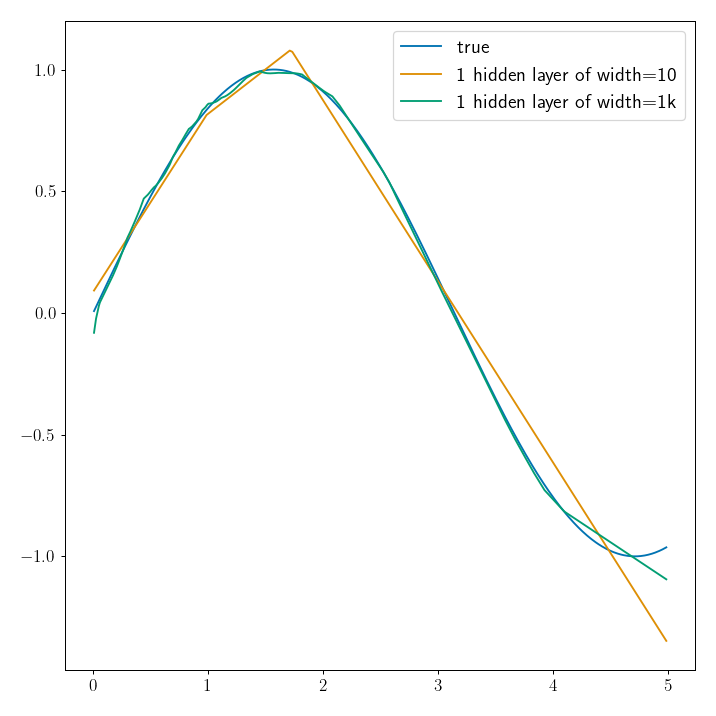

In [40]:
model.eval()
with torch.no_grad():
    y_pred = model(x)
plt.figure()
plt.plot(x, np.sin(x), label="true")
plt.plot(x, y_pred, label="1 hidden layer of width=10")
plt.plot(x, model2(x).detach(), label="1 hidden layer of width=1k")
plt.legend()
plt.tight_layout()
plt.savefig('../tex/prebuiltimages/universal_approx.pdf', bbox_inches='tight')
plt.show()

## Using multiple layers

In [41]:
class FF_2L(torch.nn.Module):
    def __init__(self, d, width=100):
        super(FF_2L, self).__init__()
        self.fc = nn.Linear(d, width)
        self.relu = torch.nn.ReLU()
        self.fc2 = nn.Linear(width, width)
        self.pred = nn.Linear(width, 1)
        
    def forward(self, x):
        out = self.fc(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.pred(out)
        return out

## SVM and Neural Network classifiers

In [42]:
from sklearn import svm
from sklearn.datasets import make_circles

Let's create a situation where linear classification isn't good and we would need to look in higher dimensions

<IPython.core.display.Javascript object>


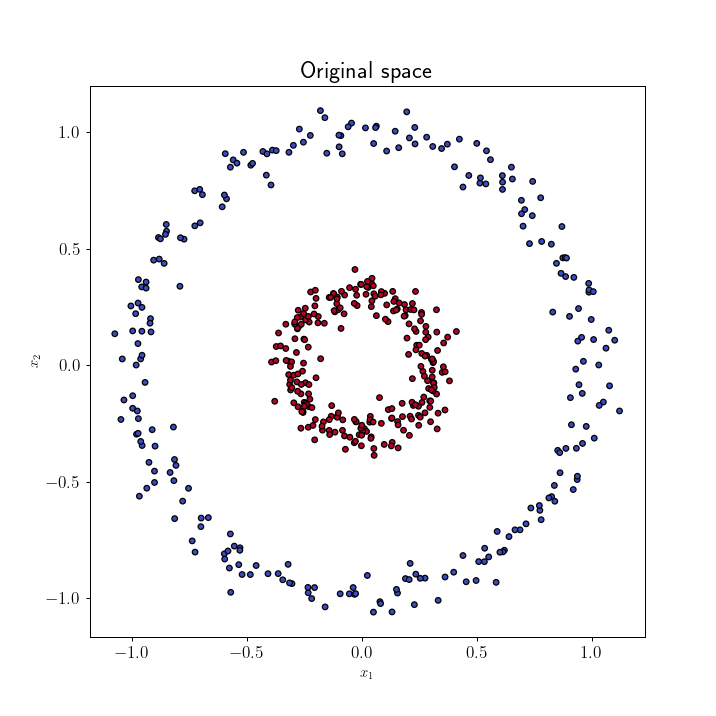

In [43]:
X, y = make_circles(n_samples=500, factor=.3, noise=.05)
plt.figure()
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[:, 0], X[:, 1], c=y,
              s=20, edgecolor='black', cmap=cm.coolwarm)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [44]:
class FF_2L_clf(torch.nn.Module):
    def __init__(self, d, width=5, n_classes=2):
        super(FF_2L_clf, self).__init__()
        self.fc = nn.Linear(d, width)
        self.relu = torch.nn.ReLU()
        self.pred = nn.Linear(width, n_classes)
        
    def forward(self, x):
        out = self.fc(x)
        out = self.relu(out)
        out = self.pred(out)
        return out

In [45]:
xx, yy = np.meshgrid(np.arange(X[:,0].min()-.1, X[:,0].max()+.1, 0.01),
                     np.arange(X[:,1].min()-.1, X[:,1].max()+.1, 0.01))

clf = svm.SVC(kernel='poly', degree=2)
clf.fit(X, y)

model = FF_2L_clf(d=2)
model.train()
Xt, yt = torch.from_numpy(X).float(), torch.nn.functional.one_hot(torch.from_numpy(y)).float()
n_epoch = 10000
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=.9, weight_decay=1e-3)
loss_func = torch.nn.BCEWithLogitsLoss()
for epoch in range(n_epoch):
    optimizer.zero_grad()
    y_pred = model(Xt)
    loss = loss_func(y_pred, yt)
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print('Epoch {}: train loss: {}'.format(epoch, loss.item()))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Epoch 0: train loss: 0.6901096105575562
Epoch 1000: train loss: 0.1707732230424881
Epoch 2000: train loss: 0.06616943329572678
Epoch 3000: train loss: 0.04517441615462303
Epoch 4000: train loss: 0.0374506339430809
Epoch 5000: train loss: 0.03382601961493492
Epoch 6000: train loss: 0.031813930720090866
Epoch 7000: train loss: 0.030669836327433586
Epoch 8000: train loss: 0.02989872172474861
Epoch 9000: train loss: 0.029396329075098038


In [46]:
model_large = FF_2L_clf(d=2, width=100)
model_large.train()
Xt, yt = torch.from_numpy(X).float(), torch.nn.functional.one_hot(torch.from_numpy(y)).float()
n_epoch = 10000
optimizer = torch.optim.SGD(model_large.parameters(), lr=1e-2, momentum=.9, weight_decay=1e-3)
loss_func = torch.nn.BCEWithLogitsLoss()
for epoch in range(n_epoch):
    optimizer.zero_grad()
    y_pred = model_large(Xt)
    loss = loss_func(y_pred, yt)
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print('Epoch {}: train loss: {}'.format(epoch, loss.item()))

Epoch 0: train loss: 0.6949372291564941
Epoch 1000: train loss: 0.05257272347807884
Epoch 2000: train loss: 0.02566550299525261
Epoch 3000: train loss: 0.020003542304039
Epoch 4000: train loss: 0.01808013767004013
Epoch 5000: train loss: 0.01733406074345112
Epoch 6000: train loss: 0.017029916867613792
Epoch 7000: train loss: 0.016908949241042137
Epoch 8000: train loss: 0.016864685341715813
Epoch 9000: train loss: 0.016854427754878998


<IPython.core.display.Javascript object>


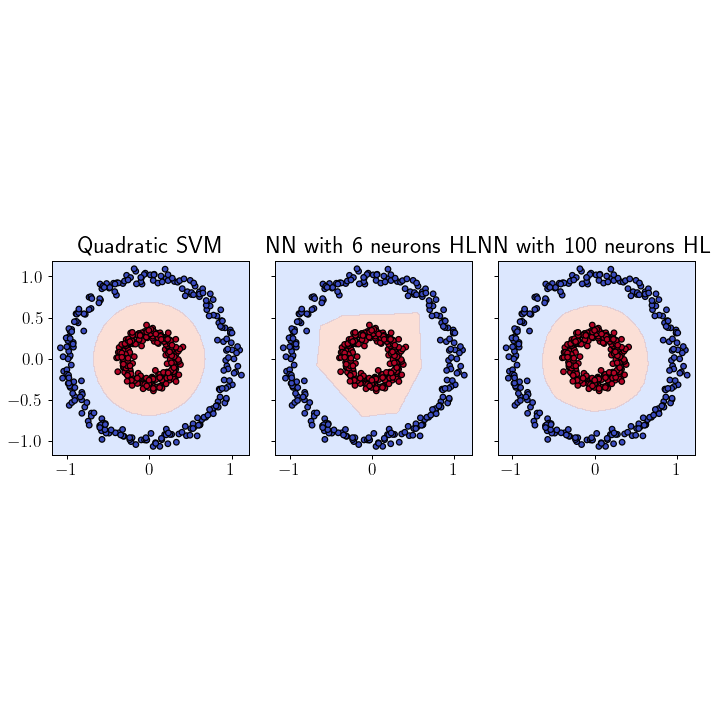

In [47]:
f, (axarr, ax2, ax3) = plt.subplots(1, 3, sharex='col', sharey='row')

axarr.contourf(xx, yy, Z, alpha=.3, cmap=cm.coolwarm, levels=1)
axarr.scatter(X[:, 0], X[:, 1], c=y,
              s=20, edgecolor='black', cmap=cm.coolwarm)
axarr.set_aspect(aspect="equal")
axarr.set_title("Quadratic SVM")

Zt = model(torch.from_numpy((np.c_[xx.ravel(), yy.ravel()])).float()).argmax(dim=1)
Zt = Zt.reshape(xx.shape)
ax2.contourf(xx, yy, Zt, alpha=.3, cmap=cm.coolwarm, levels=1)
ax2.set_title("NN with 6 neurons HL")
ax2.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='black', cmap=cm.coolwarm)
ax2.set_aspect(aspect="equal")

Zt = model_large(torch.from_numpy((np.c_[xx.ravel(), yy.ravel()])).float()).argmax(dim=1)
Zt = Zt.reshape(xx.shape)
ax3.contourf(xx, yy, Zt, alpha=.3, cmap=cm.coolwarm, levels=1)
ax3.set_title("NN with 100 neurons HL")
ax3.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='black', cmap=cm.coolwarm)
ax3.set_aspect(aspect="equal")
plt.tight_layout()
plt.savefig('../tex/prebuiltimages/svm_mlp_binary.pdf', bbox_inches='tight')
plt.show()

 ## XOR example

In [48]:
class FF_1L(torch.nn.Module):
    def __init__(self, d=2, width=2):
        super(FF_1L, self).__init__()
        self.fc = nn.Linear(d, width, bias=False)
        self.relu = torch.nn.ReLU()
        self.pred = nn.Linear(width, 1, bias=False)
        self.sig = torch.nn.Sigmoid()
        
    def forward(self, x):
        out = self.fc(x)
        out = self.relu(out)
        out = self.pred(out)
        return out

In [49]:
X_train = torch.tensor([[0,0],[0,1],[1,0],[1,1.]])

In [50]:
y_train = torch.tensor([0,1,1,0.]).view(-1, 1)

<IPython.core.display.Javascript object>


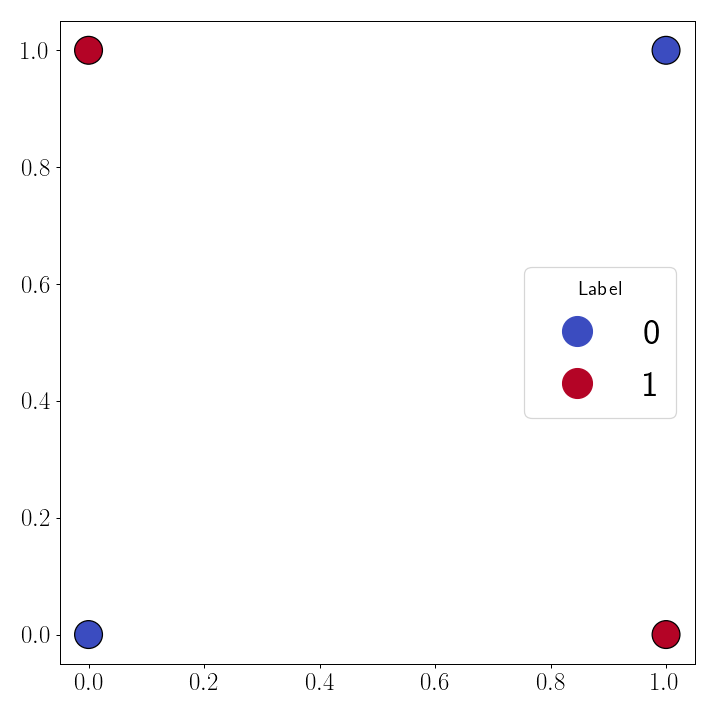

No handles with labels found to put in legend.


In [51]:
fig,ax = plt.subplots()
plt.legend(fontsize=20) # using a size in points
res = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=500, edgecolor='black', cmap=cm.coolwarm)
ax.legend(handles=res.legend_elements()[0], 
       labels=["0", "1"],
       title="Label", prop={'size': 30}, markerscale=4)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.savefig("../tex/prebuiltimages/XOR_problem_init.pdf")
plt.show()

<IPython.core.display.Javascript object>


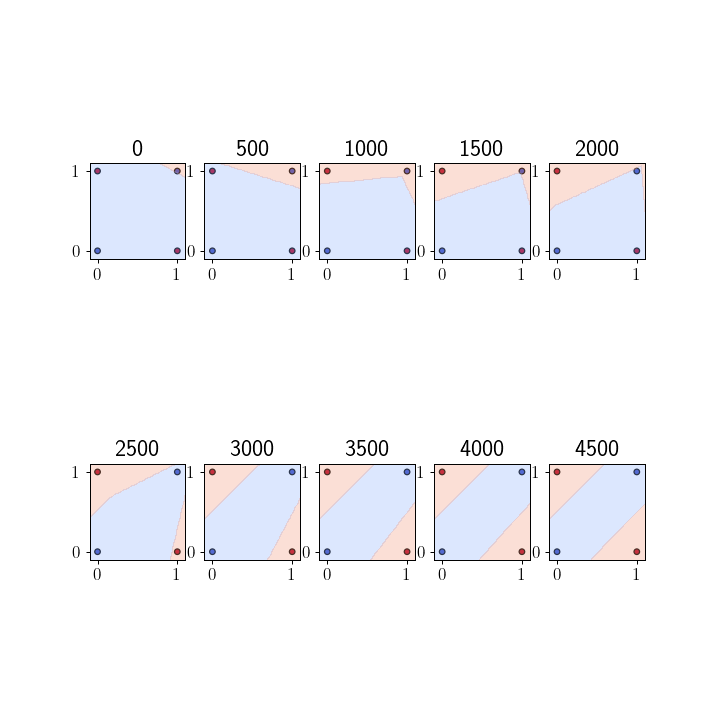

Epoch 0: train loss: 0.2593846023082733
Epoch 500: train loss: 0.342010498046875
Epoch 1000: train loss: 0.2879730761051178
Epoch 1500: train loss: 0.2605513036251068
Epoch 2000: train loss: 0.22236107289791107
Epoch 2500: train loss: 0.17013205587863922
Epoch 3000: train loss: 0.09931734204292297
Epoch 3500: train loss: 0.034110505133867264
Epoch 4000: train loss: 0.007208621129393578
Epoch 4500: train loss: 0.0012058457359671593


In [52]:
torch.manual_seed(30)
torch.use_deterministic_algorithms(True)
model = FF_1L()
model.train()

n_epoch = 5000
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-3)
loss_func = torch.nn.MSELoss()
train_data = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=1, shuffle=False)

xx, yy = np.meshgrid(np.arange(X_train[:,0].min()-.1, X_train[:,0].max()+.1, 0.01),
                     np.arange(X_train[:,1].min()-.1, X_train[:,1].max()+.1, 0.01))

row, col = 2, int(n_epoch // 500 / 2)
fig, ax = plt.subplots(row, col)
idx_row, idx_col = 0, 0
for epoch in range(n_epoch):
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model(x)
        loss = loss_func(y_pred.flatten(), y.flatten())
        loss.backward()
        optimizer.step()
    if epoch % 500 == 0:
        print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
        model.eval()
        Zt = model(torch.from_numpy((np.c_[xx.ravel(), yy.ravel()])).float()) > .5
        Zt = Zt.reshape(xx.shape).detach()
        ax[idx_row, idx_col].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='black', cmap=cm.coolwarm)
        ax[idx_row, idx_col].set_aspect(aspect="equal")
        ax[idx_row, idx_col].set_title(f"{epoch}")
        ax[idx_row, idx_col].contourf(xx, yy, Zt, alpha=.3, cmap=cm.coolwarm, levels=1)
        plt.show(block=True)
        model.train()
        idx_col += 1
        if idx_col == col:
            idx_row = 1
            idx_col = 0
plt.show()

<IPython.core.display.Javascript object>


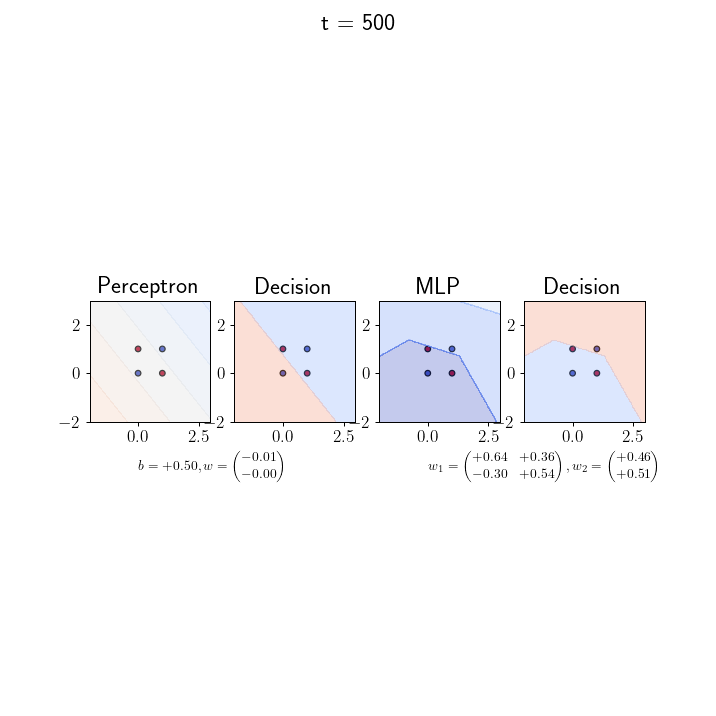

In [53]:
torch.manual_seed(30)
torch.use_deterministic_algorithms(True)
model = FF_1L()
percep = Perceptron(d=2)
model.train()
percep.train()

n_epochs = 500
sub_sample = 25
n_frames = int(n_epochs//sub_sample) - 1



optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-3)
optimizer_p = torch.optim.SGD(percep.parameters(), lr=1e-2)

loss_func = torch.nn.MSELoss()
train_data = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=1, shuffle=True)


xmin = -2
xmax = -xmin + 1
xrange = xmax - xmin

step_mesh= xrange / 200

xx, yy = np.meshgrid(np.arange(xmin, xmax, step_mesh),
                     np.arange(xmin, xmax, step_mesh))


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4) # initialise la figure
ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='black', cmap=cm.coolwarm)
ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='black', cmap=cm.coolwarm)

ax3.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='black', cmap=cm.coolwarm)
ax4.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='black', cmap=cm.coolwarm)

n_levels= 40
levels = np.linspace(0, 5, n_levels)
levels_p = np.linspace(0.4, 0.6, 20)


Zt = model(torch.from_numpy((np.c_[xx.ravel(), yy.ravel()])).float())
Zt = Zt.reshape(xx.shape).detach()

Zt_p = percep(torch.from_numpy((np.c_[xx.ravel(), yy.ravel()])).float())
Zt_p = Zt_p.reshape(xx.shape).detach()

contour = ax1.contourf(xx, yy, Zt_p, alpha=.3, cmap=cm.coolwarm, levels=levels_p)
contour_b = ax2.contourf(xx, yy, Zt_p > 0.5, alpha=.3, cmap=cm.coolwarm, levels=1)

contour_d = ax4.contourf(xx, yy, Zt > .5, alpha=.3, cmap=cm.coolwarm, levels=1)
contour_p = ax3.contourf(xx, yy, Zt, alpha=.3, cmap=cm.coolwarm, levels=levels)
tmp = 0
ax1.set_title('Perceptron')
ax1.set_aspect(aspect="equal")
ax2.set_title('Decision')
ax2.set_aspect(aspect="equal")
ax3.set_title('MLP')
ax3.set_aspect(aspect="equal")
ax4.set_title('Decision')
ax4.set_aspect(aspect="equal")

weight_p = ax1.text(xmin + 0.4 * xrange , xmin - 0.4 * xrange, '', fontsize=11)
weight_m = ax3.text(xmin + 0.4 * xrange , xmin - 0.4 * xrange, '', fontsize=11)


def animate(i):
    global tmp
    
    # perceptron update
    percep.train()
    for i in range(sub_sample):
        for x, y in train_loader:
            optimizer_p.zero_grad()
            y_pred = percep(x)
            loss = loss_func(y_pred.flatten(), y.flatten())
            loss.backward()
            optimizer_p.step()
    percep.eval()
    with torch.no_grad():
        global contour_p, contour_b
        Zt = percep(torch.from_numpy((np.c_[xx.ravel(), yy.ravel()])).float())
        Zt = Zt.reshape(xx.shape).detach()
        for c in contour_p.collections:
            c.remove()
        contour_p = ax1.contourf(xx, yy, Zt, alpha=.3, cmap=cm.coolwarm, levels=levels_p)
        for c in contour_b.collections:
            c.remove()
        contour_b = ax2.contourf(xx, yy, Zt > 0.5, alpha=.3, cmap=cm.coolwarm, levels=1)
        
        # plt.colorbar(contour_p, ax=ax1)
        w = (np.round(percep.fc.weight.data.numpy()[0], 3))
        b = (np.round(percep.fc.bias.data.numpy(), 3))
        w1 = (np.round(model.fc.weight.data.numpy(), 3))
        w2 = (np.round(model.pred.weight.data.numpy()[0], 3))
        
    weight_p.set_text(rf"$b = {b[0]:+0.2f}, w = \begin{{pmatrix}}{w[0]:+0.2f}\\ {w[1]:+0.2f} \end{{pmatrix}}$")
    weight_m.set_text(rf"$w_1= \begin{{pmatrix}}{w1[0, 0]:+0.2f} & {w1[0, 1]:+0.2f} \\ {w1[1, 0]:+0.2f} & {w1[1, 1]:0.2f} \end{{pmatrix}}, w_2 = \begin{{pmatrix}}{w2[0]:+0.2f}\\ {w2[1]:+0.2f} \end{{pmatrix}}$")  # noqa

    model.train()
    for i in range(sub_sample):
        for x, y in train_loader:
            optimizer.zero_grad()
            y_pred = model(x)
            loss = loss_func(y_pred.flatten(), y.flatten())
            loss.backward()
            optimizer.step()
    model.eval()
    with torch.no_grad():
        global contour, contour_d
        Zt = model(torch.from_numpy((np.c_[xx.ravel(), yy.ravel()])).float()).round().abs()
        Zt = Zt.reshape(xx.shape).detach()
        for c in contour.collections:
            c.remove()
        contour = ax3.contourf(xx, yy, Zt, alpha=.3, cmap=cm.coolwarm, levels=levels)
        # plt.colorbar(contour, ax=ax2)
        for c in contour_d.collections:
            c.remove()
        contour_d = ax4.contourf(xx, yy, Zt > .5, alpha=.3, cmap=cm.coolwarm, levels=1)
        w = (np.round(percep.fc.weight.data.numpy()[0], 3))
        b = (np.round(percep.fc.bias.data.numpy(), 3))
        w1 = (np.round(model.fc.weight.data.numpy(), 3))
        w2 = (np.round(model.pred.weight.data.numpy()[0], 3))
        weight_p.set_text(rf"$b = {b[0]:+0.2f}, w = \begin{{pmatrix}}{w[0]:+0.2f}\\ {w[1]:+0.2f} \end{{pmatrix}}$")
        weight_m.set_text(rf"$w_1= \begin{{pmatrix}}{w1[0, 0]:+0.2f} & {w1[0, 1]:+0.2f} \\ {w1[1, 0]:+0.2f} & {w1[1, 1]:+0.2f} \end{{pmatrix}}, w_2 = \begin{{pmatrix}}{w2[0]:+0.2f}\\ {w2[1]:+0.2f} \end{{pmatrix}}$")  # noqa
    
    tmp += sub_sample
    fig.suptitle('t = %i' % (tmp))
    return contour_p, contour, contour_d, weight_p, weight_m
 
ani = animation.FuncAnimation(fig, animate, frames=n_frames, blit=False, interval=100, repeat=False)
save = False
if save:
    ani.save("../text/videos/xor_animation.mp4")

In [55]:
def matrix_to_tex(M, dec=2):
    with np.printoptions(precision=dec, suppress=True, sign="+"):
        lines = str(M).replace('[', '').replace(']', '').splitlines()
        rv = [rf'\begin{{pmatrix}}']
        rv += ['  ' + ' & '.join(l.split()) + rf'\\' for l in lines]
        rv +=  [rf'\end{{pmatrix}}']
        return ''.join(rv)

In [56]:
def model_animation(model, optimizer, loss_func,
                    X_train=X_train, y_train=y_train,
                    n_levels=40, n_epochs=5000, sub_sample=25,
                    save=False, pos_txt=[.5, .3], name=""):
    # init model and data
    global tmp, levels_set, decision, level_half, weights

    model.eval()
    n_frames = int(n_epochs//sub_sample) - 1
    train_data = torch.utils.data.TensorDataset(X_train, y_train)
    train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=1, shuffle=True)

    # init grid view
    xmin = -2
    xmax = -xmin + 1
    xrange = xmax - xmin
    step_mesh= xrange / 200
    levels = np.linspace(0, 5, n_levels)
    xx, yy = np.meshgrid(np.arange(xmin, xmax, step_mesh),
                         np.arange(xmin, xmax, step_mesh))
    grid = torch.from_numpy((np.c_[xx.ravel(), yy.ravel()])).float()
    tmp = 0     # epochs count
    
    # initialise figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
    plt.subplots_adjust(top=1, bottom=0.1, right=.9, left=.1, hspace=.2, wspace=.1); 
    ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='black', cmap=cm.coolwarm)
    ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='black', cmap=cm.coolwarm)
    Zt = model(grid).reshape(xx.shape).detach()
    levels_set = ax1.contourf(xx, yy, Zt, alpha=.3, cmap=cm.coolwarm, levels=n_levels)
    level_half = ax1.contour(xx, yy, Zt, alpha=.5, colors = ["k"], levels=[.5])
    decision = ax2.contourf(xx, yy, Zt > 0.5, alpha=.3, cmap=cm.coolwarm, levels=1)
    ax1.set_title('Levels')
    ax1.set_aspect(aspect="equal")
    ax2.set_title('Decision')
    ax2.set_aspect(aspect="equal")
    weights = ax1.text(xmin + pos_txt[0] * xrange , xmin - pos_txt[1] * xrange, '', fontsize=11)
    fig.subplots_adjust(top=1.25)
    
    def animate(i):
        global tmp, levels_set, decision, level_half, weights

        model.train()
        for i in range(sub_sample):
            for x, y in train_loader:
                optimizer.zero_grad()
                y_pred = model(x)
                loss = loss_func(y_pred.flatten(), y.flatten())
                loss.backward()
                optimizer.step()
        model.eval()
        with torch.no_grad():
            Zt = model(grid).reshape(xx.shape).detach()
        for col in [levels_set.collections, decision.collections, level_half.collections]:
            for item in col:
                item.remove()
        levels_set = ax1.contourf(xx, yy, Zt, alpha=.3, cmap=cm.coolwarm, levels=n_levels)
        decision = ax2.contourf(xx, yy, Zt > 0.5, alpha=.3, cmap=cm.coolwarm, levels=1)
        level_half = ax1.contour(xx, yy, Zt, alpha=.5, colors = ["k"], levels=[.5])
        
        all_w = rf"$"
        recall = 0
        for idx, layer in enumerate(model.children()):
            if isinstance(layer, nn.Linear):
                w = matrix_to_tex(layer.weight.detach().data.numpy())
                b = layer.bias
                all_w += rf"w_{idx+1-recall}={w}, "
                if b is not None:
                    all_w += rf"b_{idx+1-recall}={matrix_to_tex(b.detach().data.numpy())}"
            else:
                recall += 1
        all_w += rf"$"
        weights.set_text(all_w)
        tmp += sub_sample
        fig.suptitle(f'{name}: t = {tmp}')
        lines = [level_half.collections[0]]
        labels = ['levelset=0.5']
        ax1.legend(lines, labels, loc="upper left", prop={'size': 12})
        return levels_set, decision, level_half, weights
 

    ani = animation.FuncAnimation(fig, animate, frames=n_frames, blit=True, interval=100, repeat=False)
    if save:
        ani.save(f"../tex/videos/xor_animation_{name.replace(' ', '_')}.mp4")
    return ani

<IPython.core.display.Javascript object>


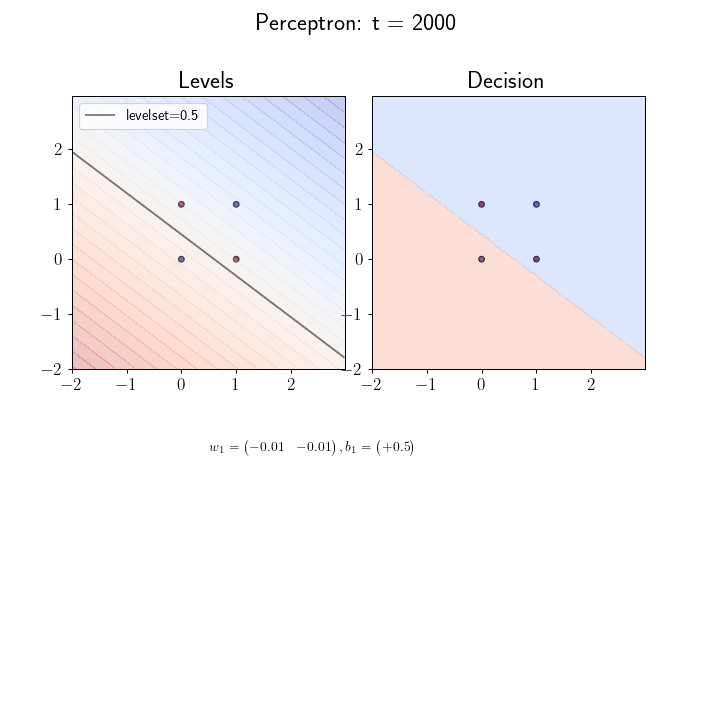

In [57]:
torch.manual_seed(30)
torch.use_deterministic_algorithms(True)
percep = Perceptron(d=2)
optimizer_p = torch.optim.SGD(percep.parameters(), lr=1e-2)
loss_func = torch.nn.MSELoss()
anim = model_animation(percep, optimizer_p, loss_func,
                       X_train=X_train, y_train=y_train,
                       n_levels=40, n_epochs=1000, sub_sample=25,
                       save=True, name="Perceptron")

<IPython.core.display.Javascript object>


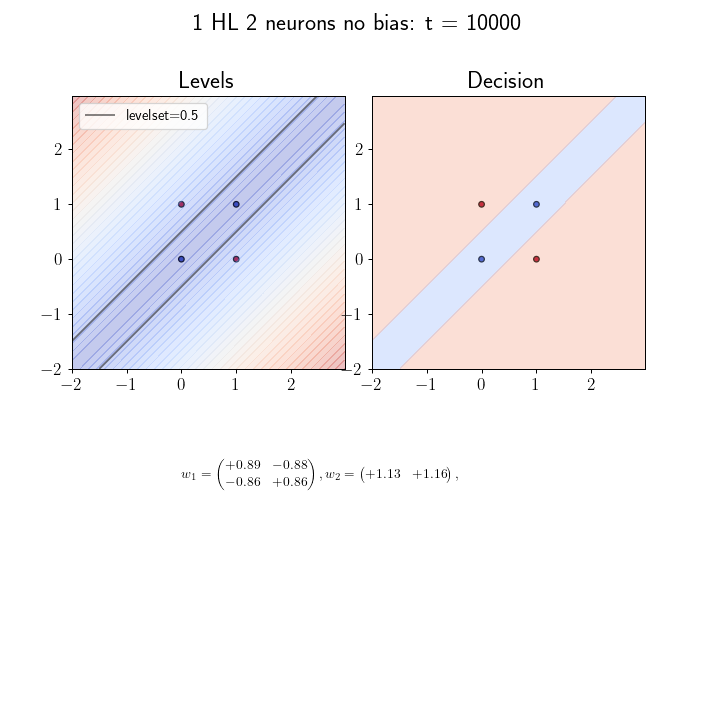

In [58]:
torch.manual_seed(30)
torch.use_deterministic_algorithms(True)
model = FF_1L()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-3)
loss_func = torch.nn.MSELoss()
anim = model_animation(model, optimizer, loss_func,
                       X_train=X_train, y_train=y_train,
                       n_levels=40, n_epochs=5000, sub_sample=25,
                       save=True, pos_txt=[.4, .4], name="1 HL 2 neurons no bias")

In [59]:
print(model.pred.weight.data.numpy())

[[1.1260241 1.1637139]]


In [60]:
model(X_train).round().abs()

tensor([[0.],
        [1.],
        [1.],
        [0.]], grad_fn=<AbsBackward>)

In [61]:
print(str(percep.fc.weight.data.numpy()[0]) + str(percep.fc.bias.data.numpy()))

[-0.00540752 -0.00715747][0.50323164]


In [62]:
class theo_xor(torch.nn.Module):
    def __init__(self, d=2, width=2):
        super(theo_xor, self).__init__()
        self.fc = nn.Linear(d, width, bias=False)
        self.relu = torch.nn.ReLU()
        self.pred = nn.Linear(width, 1, bias=False)
        self.sig = torch.nn.Sigmoid()
        
    def forward(self, x):
        out = self.fc(x)
        out = self.relu(out)
        out = self.pred(out)
        return out

<IPython.core.display.Javascript object>


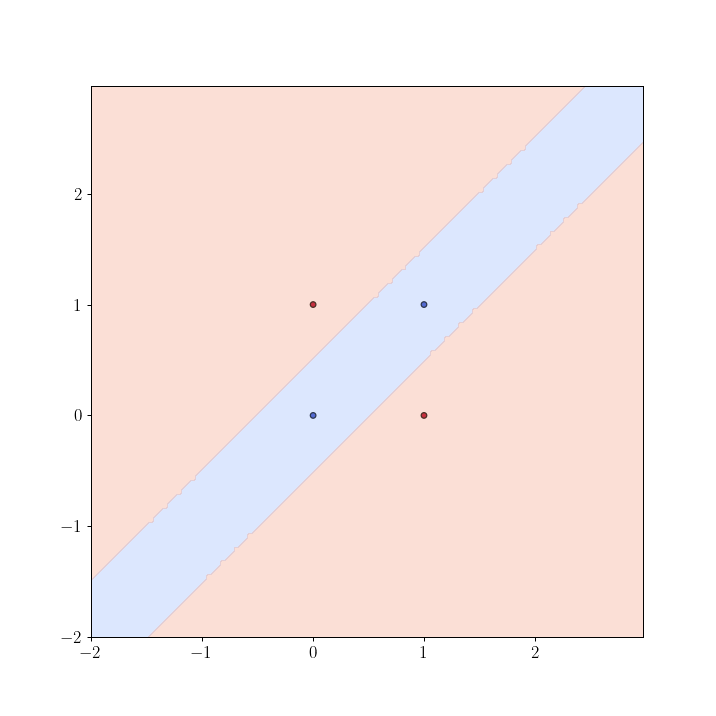

In [63]:
model2 = theo_xor()
model2.fc.weight.data = torch.tensor([[1, -1], [-1, 1.]])
model2.pred.weight.data = torch.tensor([[1, 1.]])

Zt = model2(torch.from_numpy((np.c_[xx.ravel(), yy.ravel()])).float()) > .5
Zt = Zt.reshape(xx.shape).detach()
fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='black', cmap=cm.coolwarm)
ax.set_aspect(aspect="equal")
ax.contourf(xx, yy, Zt, alpha=.3, cmap=cm.coolwarm, levels=1)
plt.show()

### With bigger layer

In [66]:
torch.manual_seed(30)

model = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)

EPOCHS = 100

optimizer = torch.optim.Adam(model.parameters(), lr = 0.03)

for epoch in range(EPOCHS):
    #forward
    y_est = model(X_train)
    
    #compute mean squared error loss
    loss = torch.nn.functional.mse_loss(y_est, y_train)
    #backprop the loss gradients
    loss.backward()
    #update the model weights using the gradients
    optimizer.step()
    #empty the gradients for the next iteration
    optimizer.zero_grad()

In [67]:
model(X_train).round().abs()

tensor([[0.],
        [1.],
        [1.],
        [0.]], grad_fn=<AbsBackward>)

<IPython.core.display.Javascript object>


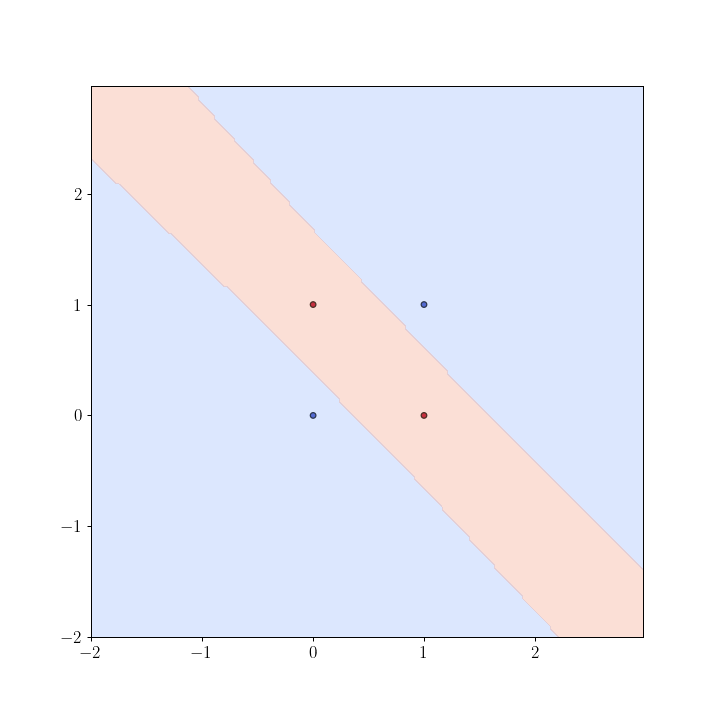

In [68]:
Zt = model(torch.from_numpy((np.c_[xx.ravel(), yy.ravel()])).float()) > .5
Zt = Zt.reshape(xx.shape).detach()
fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='black', cmap=cm.coolwarm)
ax.set_aspect(aspect="equal")
ax.contourf(xx, yy, Zt, alpha=.3, cmap=cm.coolwarm, levels=1)
plt.show()